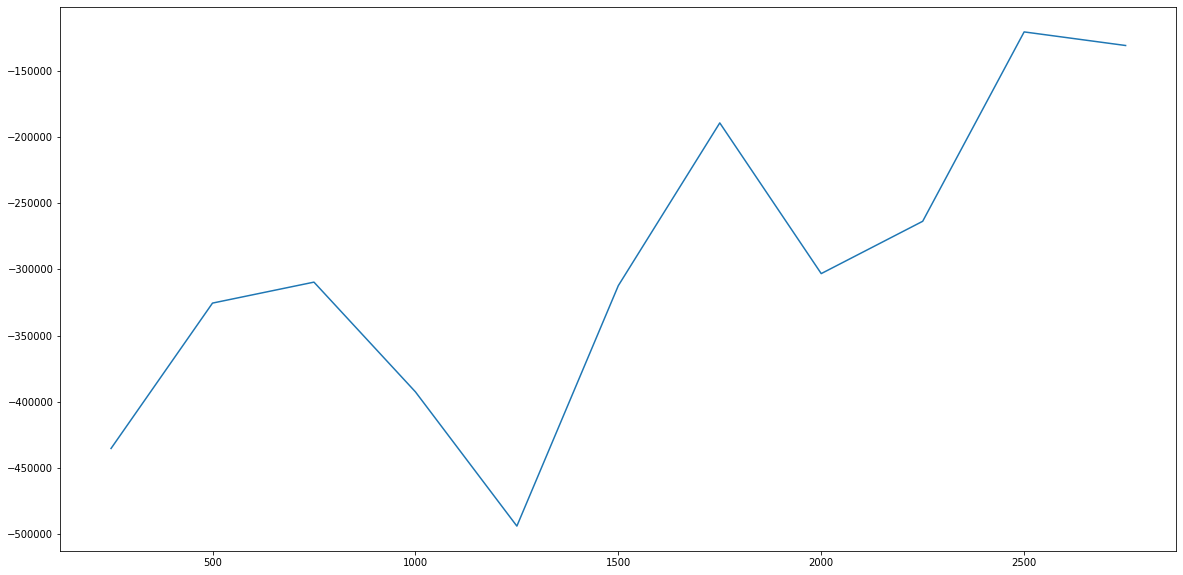

In [1]:
#CC show accumulate Earn money per ET
import pandas as pd
import os,re
import config as sc

system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try"
#system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E"
dnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC")
x=[int(re.findall(r'ET(\d+).csv',fn)[0]) for fn in os.listdir(dnwp) if "_" not in fn]
x.sort()
acc_earn=[]
for ET in x:
    fnwp=os.path.join(dnwp,"ET{0}.csv".format(ET))
    df=pd.read_csv(fnwp)
    df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))

    dfr=df[["StockS","Sell_Earn"]].groupby(["StockS"]).agg(totalEarn=pd.NamedAgg(column="Sell_Earn", aggfunc="sum"))
    acc_earn.append(dfr["totalEarn"].sum())

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(x,acc_earn)


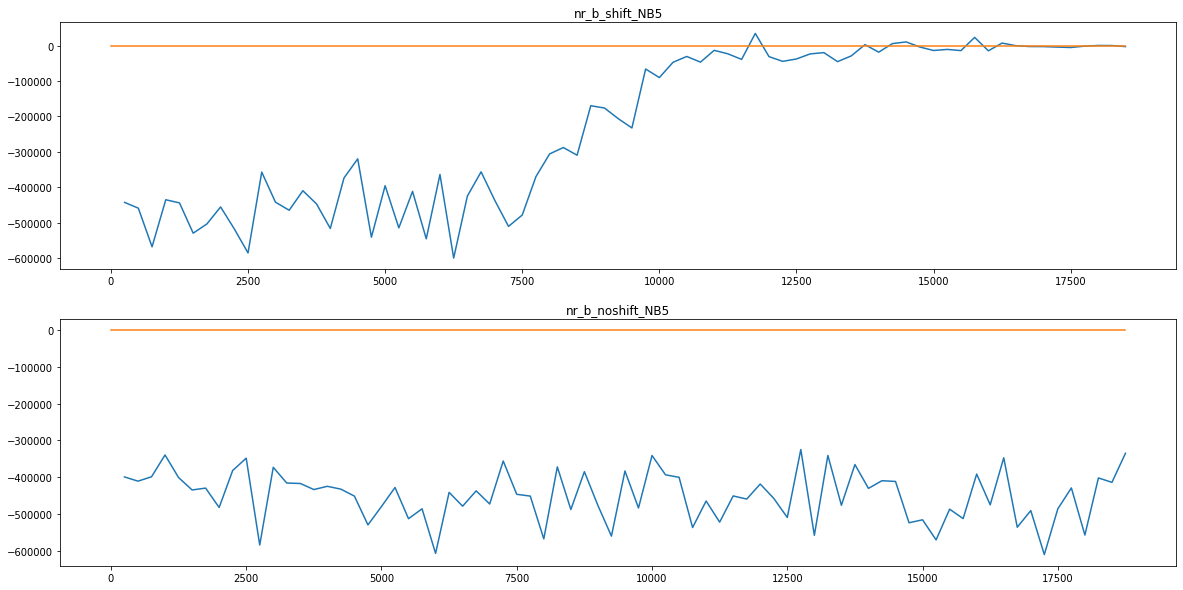

In [22]:
#CC show accumulate Earn money per ET
import pandas as pd
import os,re
import config as sc

def get_acc_earn(system_name):
    dnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC")
    x=[int(re.findall(r'ET(\d+).csv',fn)[0]) for fn in os.listdir(dnwp) if "_" not in fn]
    x.sort()
    acc_earn=[]
    for ET in x:
        fnwp=os.path.join(dnwp,"ET{0}.csv".format(ET))
        df=pd.read_csv(fnwp)
        df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))

        dfr=df[["StockS","Sell_Earn"]].groupby(["StockS"]).agg(totalEarn=pd.NamedAgg(column="Sell_Earn", aggfunc="sum"))
        acc_earn.append(dfr["totalEarn"].sum())
    return x,acc_earn


#system_names=[#"Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D",
              #"Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try4",
             #"Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try42",
            
            #"a432_12_1","a432_12_2"]
    
#system_names= [#"nr_b",
#    "nr_b_shift","nr_b_noshift"]
system_names= [
    "nr_b_shift_NB5","nr_b_noshift_NB5"]

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
for idx, _ in enumerate(system_names):
    fig.add_subplot(len(system_names)*100+10+idx+1)

#fig.add_subplot(311)
#fig.add_subplot(312)
#fig.add_subplot(313)

allaxes = fig.get_axes()

for idx,system_name in enumerate(system_names):
    x,acc_earn=get_acc_earn(system_name)
    allaxes[idx].plot(x,acc_earn)
    allaxes[idx].set_title(system_name)
    allaxes[idx].plot([0,x[-1]],[0,0])
plt.show()


In [21]:
#CC list total earning per stock on a given ETdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJ8AAAJOCAYAAAAZP6bBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd5wU9f3H8ddn93qj3cEBAkeRjqIUu2IvMdbE2LtRE1NNjCkmJsYYzS9qihq7aOxGsXcBC1hAUTrS4Wh3lOtly/f3x8wde+c14O72ON7PRza7O/Odme/Mzq7M5z7fz5hzDhERERERERERkbYQiHcHRERERERERESk81LwSURERERERERE2oyCTyIiIiIiIiIi0mYUfBIRERERERERkTaj4JOIiIiIiIiIiLQZBZ9ERERERERERKTNKPgkIiIitczsYjP7MN79aA1mNsnM1sa8n29mk+LYpd2emTkzG9LIvPPM7K2Y94eY2ddmVmpmp7VfL0VERKSjUfBJRETiwsxWmlmFf2G61cxeNbN+rbDe/5rZejMrNrMlZnZ5vflHm9kiMys3s6lmNiBmXrKZPeQvu8HMft6C7R1oZm+b2RYzKzCzZ82sd702E83sNTPb5rf71MwuiZmfZWZ3mtlq/3gs9d9nN7PtQ81shpkV+ev9yMwmtPxotT4zu9HMQv5+1DwGxcwfa2az/eM/28zGtmCdj5hZtb+uLf7xHr6jfXPOjXLOTdvR5er1ZaWZHbMr6+isnHOPO+eOi5n0J+DfzrkM59wUM5vWwPcxz/8elvvfy2Pqzf+Z/10s8r+byTHzbjKzuWYWNrMbW9JHP7ga8c+lYjP70sxO9ucdFnPOlvmBttjzuH8L1v+I358+MdPO8c8bq9c2wcw2mdnJZpZkZs/57VxLg6T1vhs1jy+bWWaomb3o/15tMbM3zWxYzPya73CJ/1hiZv+u/7vWyLrrBHx3lZk9bPUCntbMb7yIiHRMCj6JiEg8fds5lwH0BjYC/2qFdd4C5DnnsoBTgD+b2TgAP5jzPHAD0B2YBTwds+yNwN7AAOBI4DozO6GZ7XUD7gPy/OVKgIdrZprZQcB7wHRgCNADuBo40Z+fBLwLjAJOALKAg4HNwMTGNmpmWcAreMesO9AX+CNQ1Ux/24yZBf2XT/sBh5rHcn9+EvAi8F+84zYZeNGf3pzb/HNlL2AT8Eir74C0tgHA/GbaPAl8gfe9+C3wnJnlAJjZ8cD1wNF4369BeOd4jaXAdcCrO9ivmf651BW4G3jKzLo65z6oOWfxvo8AXWPO49VNrdTM0oEzgSLgvJhZL/jbOqLeIicADnjDf/8hcD6wYQf357Z637d9m2nfFXgJGAb0Aj7F+17Geto5l4n323I6kAvMbkkAqjlmltDCdocCgxuY1ehvvIiIdFwKPomISNw55yqB54CRAPUzJCxmKJiZ3WVmf49d3sxeNrOf+uua75yrCcA4/1FzAXMGMN8596y/zRuBfWOyaC4EbnLObXXOLQTuBy5upu+v++srds6VA/8GDolp8jdgsnPuVudcofPMds6dFbPN/sDpzrkFzrmoc26Tc+4m59xrTWx6qL/9J51zEedchXPuLefcVzHH5QozW+hnLywws/396deb2bKY6ac3thEzG27bM7sWm9lZMfMeMbN7zMvqKsML2DVlEpAA3Omcq3LO/RMw4KhmlqvlH+MngNF+H5LNyxJb5z/ujM2OqbcvtVlLZhY0s9/EHIfZZtavufOrKf7xXuofq5dqsl/Mc4ef5VJkZl+ZWU3/T/I/gxIzyzezX/jTJ5nZWjO71l9uvdXNlks2s/8zL1tuo5n9x8xS/XnTzexM//WhfubISf77Y8xsTjP7McRfR5GZFZrZ0/WaHGPecLqt/vEyf7nY7+kyvGDRy+Zl49wCHAb823//bzMbCuwP/ME/f/8HzMUL4ABcBDzof6e3AjcR8310zk12zr2OF/DdYc65KPAYkI4XdN5VZwLb8DK+LorZTiXwDN53PdaFwOPOubBzrto5d6dz7kMg0gp9aZRz7lPn3IPOuS3OuRBwBzDMzHo00DbknJsPfA8oAK5tbL1+8O11oI9tz8LqY14m1XPmZSwVA9ebl+nWI2bZceZlYiX67xPwAuvXNNCnpn7jRUSkg1LwSURE4s7M0vAubj5uQfPJwDlmFvCXzcbLjHgyZn13m1k5sAhYD9QEcUYBtUNSnHNlwDJglJl1A/rEzvdfj2LHHI6f7eHv10F4gbXGHAO84Zwr3cHtLAEiZjbZzE70+1/LzL6LF1y7EC+b6hS8bCrw9vkwoAteJsl/rYGMBv9i8m28YE9P4BzgbjOLPSbnAjcDmXiZGwDf9gMw883s6pi2o4CvnHMuZtpX7MAxNrMMvKySL/xJvwUOBMYC++Jli/2uBav6ub8/J+Edn0uBclpwfjXSr6PwMjLOwsvkWwU85c8+Du+8GIqXdfI9tn8WDwJX+lkmo/Gy5Grk4n1GfYHLgLtiPudb/fWNxcuo6wv83p83HS/Qh7/d5WzPujncn9+Um4C38LLT9uKbGYknAxPwjvdZwPH1V+CcGwysxs9udM79GvgAuMZ/fw3e577cORcbPIr9ztX5vvqvezUUJNkZ5mXqXQKE8D6vXXUR3nnyFDDc/GCvbzLwnZgAYRfg28CjrbDdXXU4sME5t7mxBs65CF521GFNtCnDy+hcF5OFtc6ffSre72BX4O/ANLxzp8b5wFN+MAzgZ8D7scH0WE38xouISAel4JOIiMTTFDPbBhQDx+JlCTXJOfcp3rCWo/1JZwPTnHMbY9r8AC8YchjeMLuav5Jn+MvGKvLbZsS8rz+vRcxsH7wAwC/9Sd3w/lu7vonFejQzv0HOuWLgULy/+t8PFPjZNr38JpfjDcf5zM+2WuqcW+Uv+6xzbp2fZfU08DUND/E7GVjpnHvYz874HPgf8J2YNi865z7y11WT4TECyAGuAH5vZuf4bZs6/s35hX+uLPXXc7E//TzgT362WAFeMO2CFqzvcuB3zrnF/vH50jm3uSXnVyPOAx5yzn3uZ2X8GjjIzPLwghuZwHDAnHMLnXM1n3kIGGlmWX7G3ecx6wz5+xbys+BK8TJUDO/Y/szPXikB/uL3FbzgUmyw6ZaY90fQfPAphDdkro9zrtLPxon1V+fcNn8Y2lS8ANjOaO58qD+/5nWLv5ONONA/lyqB/wPOd85t2pUVmlcP6kjgCf9ceZe62U8f4Q0trskyPAtY4pxrMguthX5hXj25msfkHej3XsBdeMHY5qzDG4a3M2Y656b4vxMVeMG48/0+BPECwY/57/sBV7I9mPoNTfzGi4hIB6Xgk4iIxNNpzrmuQDLe8IrpZpbbguVqL1z858fqN/CHon2Il7lRk31TipflEisLb9hOacz7+vOaZV5B3NeBnzjnPvAnbwWieJkwjdnczPxG+UGMi51ze+FlzfQB7vRn98PLcGqorxea2Zyai1V/2YaKmw8ADoi9sMULssR+Rmvq9WmBH9iKOOdmAP9ge7CqqePfnP9zznV1zuU6505xztXsWx/qZq2s8qc1p9HjQwvOrwbU6YefybYZ6Oucew9vOOZdwEYzu8+8ml3gDdU6CVjlD3U7KGadm51z4Zj35XgBmRwgDa8GT83n8oY/HWAmMNQPRI7Fy67p52dxTQTeb2ZfrsMbDvmpn712ab35sTWJavq0M5o7H+rPr3m9U8PsYnzs/+50w6t91Gg2zw64AFgYE0x6HDi3ZhiZ71G2D727AO88aw01342ax0XNLwLm1dZ6C7jbOddkZp+vL7BlJ/u4pt77F/GCroPw/vBQ5Ad+wfsN+5Nzrn5gso5GfuNFRKSDUvBJRETizr+IeB6v1smhQBnexXWN+gGp/wKnmtm+eFk2U5pYfQLb64HMxxsqBNQOKxuMVwdqK14GUmyx3n1pvmAy5t0x7x28elG1gQrn1SeayfYaNg15Bzje78tOc84twivCPdqftIYG6qD4fb0fL9jXw78In4cXbKhvDTC93oVthnMu9kLPNbAc9ebXrHs+sE9NjSDfPrTgGDdhHV6QrEZ/f1pzGjw+vh05vxrsh/959gDyAZxz/3TOjcMbSjYUPzvOz0w7FW9Y4xS8zLHmFAIVwKiYz6WL8wpl15x3s4GfAPOcc9XADLzslmXOucKmVu6c2+Ccu8I51wcvA+Vui7nb2C6of67MBwaZWWwmU+x3rs731X+9sanhYTvUGS9A+APgAjPbbxdXdyHevmwwsw3A7XgB3RNj2jwKHO0HGA/EG84aF/7wzbeAl5xzN7egfQBvmOAHzTRt7PegzvSYLMnz8AJxsQHeo4G/xRxLgJlmdm4j6479jRcRkQ5KwScREYk785yKl4mwEJgDnGFmaf5F72Wx7Z1za4HP8C5Y/ucP48DMeprZ2WaWYV5B6ePxhnPU1NF5ARhtZmeaWQresI6v/MANeBeHvzOzbuYVIb+CZu6qZmZ9/fXf5Zz7TwNNrgMuNrNf1tSqMbN9zaymHtBjeIGQ/5lX3DtgZj3MK4Z9UhPbHW5eMeq9/Pf9/H2tqZv1AN5wnHH+8R3iB57S8S4EC/zlLmF7wKq+V/AyaC4ws0T/McHMRjTRr1P942dmNhH4MdvvpDUNL8D4Y/MKZtcUE36vgVW11JN4n1mOn9nze7zgUXMeAG4ys739vu5T8/k0dn7FSDSzlJhHAl4g4RIzG2tewfO/AJ8451b6x+wAPwumDG+4V8TMkszsPDPr4te6KaYFxaadVyj7fuAOM+sJ3nnon+81puNnE/rvp9V73ygz+27NeYWXveda0q8W2IhXhBwA59wSvO/6H/zjeDpeMPJ/fpNHgcvMbKQfLPkdMd9H/3xMwfv3bIK/jpo7LraIH8h6gCaGeDXHDyYNxssqG+s/RuOdE7FD71bh1UV7EnjbObeh3nqS/f0BSPL3p6Gg8C7xs+7eBD5yzl3fTNtE//v+JN4fAW5vZvUbgR7m1bRqzqN4w2dPoe53diheoLHmWIIX+HqhBb/xIiLSQSn4JCIi8fSymZXiXXTfDFzkvDsr3QFU413ITMYbwlLfZGAMdf9i7vCGX6zFu2j+P+CnzrkXAfyaQGf629oKHMD2OjkAf8AbirUK7yL9b865N2ja5XgX1H+w7Xd4qi0e7g89O8p/LDezLcB9+AVy/fpAx+AVzn3bPxaf4mVNfNLEdkv8/n9i3p3mPsbLYLrWX++z/n4+4bedAnR3zi3AK/g7E+/4jgE+amgDfi2h4/xjtA5vuNWteMMkG3M2Xl2mEryLy1udc5P99VUDp+FliWzDK/J9mj99Z/0ZmIVXuHwu8Lk/rTm342VevIV3zB8EUmPmN3R+1XgNL/Oo5nGjc+5d4Aa8wMl6vGBEzbmVhRcs2op3bm3GOzfBy/pYad5dwK5i+3C/5vwK7zh/7C/7DjAsZv50vJo47zfyvikT8M6rUrxhaT9xzq1oYb+a8g+8ottbzeyf/rSzgfF4x+avwHf87yn+d+82vLpSq/zHH2LWdz/e8T8Hr/B8BS2r91XfncBJ5tVs2xkX4dU+m+tnjW3wA0v/AE42s9g6SZPxMuQaKjS+GG8f+uIFhyqom9XXmOtif3vMrMnMNry6UxPwgqWxy/WPafM9//PfhncObAbGue0FxBvkB/KfxPut22b+HR8bafsR3rDkz51zK2Omb6p3HAEK/SBwk7/xIiLScZlzzWXLi4iIdDxmdjjeX8vz/EwQkVaj80uk7ZnZe3hF2h+Id19ERKRtJcS7AyIiIjvKH770E+ABBQakten8Eml7ZjYB2B84Nd59ERGRtqdhdyIislvx649sw7tD3J3NNG+tbf6m3vCUmsfrbbzd/o1st/4Qmd2eeXdVa2g/z2vnfrT7+RUPZvafRo53Q3XLditttW9NfBdb4255TW13h78bfi2xhpbZleL+Neve5d9DM5uMN1T0p/7wXhER6eQ07E5ERERERERERNqMMp9ERERERERERKTN7HE1n7Kzs11eXl68uyEiIiIiIiIi0mnMnj270DmX09C8PS74lJeXx6xZs+LdDRERERERERGRTsPMVjU2T8PuRERERERERESkzSj4JCIiIiIiIiIibUbBJxERERERERERaTMKPomIiIiIiIiISJtR8ElERERERERERNqMgk8iIiIiIiIiItJmFHwSEREREREREZE2o+CTiIiIiIiIiIi0GQWfRERERKRW/rYKFqwrxjkX766IdGqlVWFCkWi8uyEi0i4S4t0BEREREYm/iuoId01dyr3vLyMUcQzKSee0sX05bWxf+vdIi3f3RHZrzjlWbS5n1qqtzF61ldmrtrBkYymZKQkcPbwnx43K5YihOaQn6/KsOeXVYZZsLGXdtgpyu6QwKDudrmlJ8e6WiDTDOsNftczsBOAfQBB4wDn318bajh8/3s2aNavd+iYiIiLS0b29YCM3vjSf/G0VnL5fX8bndeOlOev4ZMUWAPbv35XT9+vLt/bpQ/f09r/Ii0Qdc/OLmLZ4Ex8tLaQiFCErJdF7pCaQlZJIZszrrNREslISyEpNJNN/zkhKIBCwdu+77JmqwhHm5Rcxa6UXbPp89VYKS6sByExJYP/+3divf1fWbq3g3YUb2VoeIikhwGFDsjl+VC5Hj+hJj4zkOO9FfEWijpWby1i8oYRFG0pYvKGYxRtKWLWlnPqXsF3TEsnrkc7A7HTyeqSTl53mvc5OJyslMT47ILIHMrPZzrnxDc7b3YNPZhYElgDHAmuBz4BznHMLGmqv4JOIiIiIZ82Wcm58aT7vLtrE0F4Z/OnU0Rw4qEft/PxtFbw0Zx0vzsln0YYSEgLGEUNzOHW/vhw7ohepScE261tBSRUffF3A9CUFvL+kgK3lIcxgn7260iM9ieKKEMWVIYorwpRUhiirjjS5PjPITE7wA1Pbg1JZKYlkZyaRm5VCblYKPbNSyO2SQs/MZBKDu1eFispQhC1l1bWPreX+c1k1W/zX5dURuqcn0TPT28eeWcn0zEwhJzOZnpnJu33mTTgSZeXmMhasL2HR+mJKq8L0yvL2NbdLCr2yvEdWSgJmrReMLCyt8oJMq7Yya9VW5q4totofUpfXI439B3Rj/IDujBvQjb17ZtQJhIYjUWat2sqb8zfw1vyN5G+rIGAwfkB3jhvVi+NH5dKve+fNPnTOUVBaxeINJbWBpkUbivl6YylVYe8YBgzystMZnpvJsF5ZDMvNpF/3VNZvq2Tl5jJWFJaxcnMZKwvLWVdUUSc41SM9iTw/KDUwO632dV52OhmtfL5Hoo6qcISqUJRQNErQjIAZgYARDBgBg4DVvPbet+Z5KBJvnT34dBBwo3PueP/9rwGcc7c01L7TBJ9evx42zI13L0RERGQ3FHWOdUUV5G+rwDD26pZKbpcUAjR+EVRWHaawtIrNpdVUR6IEzOienkR2RhJdUhOxJpZtCYejtDLMtooQ28pDlFWHAUgMGF3SkuiamkiXtEQSAw0HhKI4IlHvEY7UvI4SrplW59mfHvHehyJRGvoXcWIgQGKCkRQMkJQQ2P6cECDRf50QsF3e99hjEHXexXjUeZ9TNLq9j+GIIxT1nsORKKGo/+zvR7SJf9cnBIyEYICgGaFItNF9Dpi3vzX7XbOficFAnenBVtzvnRWKRimvjlBeFfaeqyOUh8K1gQcDAgEjEv3mngaM2n2L/XwT670PNBAYcDgqQhFKKsOUVIYprQxR6QdJDEhPTiAzJYHMlEQykhNI2oEgpsNRXh2pDRqWh7ygalpSkG5pSXRPTyItKdguxz4acyBrtrar2404R0V1hPLqmM+sOkw45jNKDAZISwqSlhgkNSlIenICqYnBBj+LxvpdGYpQGYpSGY5QGYpQ4b+vX2MrMRggJSFASmKQpIQADnDRmO+fc7ja1/W+mw3M29kra/P/r+b4Wv1jHvO+0W24b75pqj+GEQh8MxhW+9oPlgVrX8cE0AIWE1jz2jgg6h+7iP/bFXXe727NMYv406JRv02ddtuPazTqsJqgXez2/OdgbH8CNDovtr/OUbv9Os9RR6T+vKgjEtP32HmRZn5rd8Zi8hh92T3s269rq643HpoKPu3ef9rw9AXWxLxfCxwQ28DMvg98H6B///7t1zMRERGRDmZbRTUrC8uoDEfpnp7EgB5pJAebz2BKT0ogvXsC/bunUVwZprCkii3l1RSWVpEYDNAjPYnsjGTSk1t+YVwdibKtvJptFSGKKkK1QYLM5AT6dUula1rLL7QDeBcfiQF2+F+4Di9gVR2JUh2O1j6HYt6XVtW9QK5hhhesiAnSwPYL0roXqP5FaiMXty29nAmakRD0gkmJwQCpSQES/eBSQtBIDHpBsUT/fUMBMocf1PL3LxRx2/c5EiUUjlJWFaY60vCFlpkXnKvZ50R/uw293tVAVU2wp7xqe7CivDpSm1kEXpAyLTmB3NQU0pISSEsK1gYsIs7V+SxDMZ9xzWcbKo/SwMdLMFA3+BiKRCmpCteeqwkBIzMlkZ5ZCWQmJ5CenNDiIElDDPO+a0kJ9OuWRmU44mWulVWTv80LGCcnBGoDUZkpCTt1bCPO+7y3n+8RqsJ1z/+Gzvft/aQ2WGK1E7wn7/32XtUcDueo85kFzEj1g2ppycHaz62xAHNLBcz8dTW8315gyg9O+a+3lYcIRaNe/217hpL5z7FZSokBCFjgm/NiMpsCMQfF4fD/V3scwPvex06r+QWo+bo5/03d5eoe05aw+q9qP4/tgZeagE911BENUxt8qfl9ak2BmOO2PdAFCUEjaIHaoJerF7AKRRyRcHR736I7H+xrvo/bA1fBmKBWUnB7/1ozY21QanpchrS3t84QfGroU68b93XuPuA+8DKf2qNTbe7ERstaiYiIiHzD+qIKbnplAa8t3sDA7HT+eMoohg7N2eH1GNDFf/QNRZi6aBNT5uQzdVEB1YVRBuWkc/rYvpzaQKHy6nCU2au2Mm3JJqYvLmDRhhIAemUlM2l0T44YlsMhQ7Lpktq+NVoMSPQf6U20qwpH2FRcxaaSSjYUVbGhuJJNxZVsKK5kQ1Elm0qqKCipwgxSEoMkJwT8R5DkxJjXCQGS681PSWy4XUpikG5piXRL94INXdMSSU7Y9eGOsfvc3ICu0qowm4q9/dtUUsWm4koK/NcFJVUUlnqPzWXVDV6oJiUEyMlIJjvDC1BmZySTnRnzOiOZHP991MGi9cUs3FDCwvXFLNpQzJKNpVT7mUWJQWNwTgYjBmUxoncmw3OzGNE7i5zMxusjBf1HShP76JyjuDLMxuJK/1FV+3pDUSUbS6rYWFRJZkoC44d1Y5w/hC6vR1qbDptKAXr7j8LSKt5ZsJG3Fmzkw68LqS70AsjHjOjJcSNzOXTvbJITAhRXhtlQVMn6ogr/2duH9cWVbCiqYH1RJSWV4W9sq3u6P/y0i/folZlCQtBqs30iUbf9dZ2sFb752s9uiTovUOCcd87lZaczLDeT4bmZ9OuW1u512IJ43/GGvueRqCOounDfEI5EqQxHKa8OU1kdpTwUpqI64j1CXkC4ojpCIGCkJgZJSwqS4j+n+kHg1CR/ekKwVT/zar9fZX4GZFlMJmSZH6Quq/L6m5TgZ9QlJZCeXPc5dnpr97ElBrbr1uJHw+5EREREOrFQJMpDH67gH+9+TSTq+NFRQ7ji8EGtEsCIVVQe4rV565nyRX5tofJxA7px2tg+BALG9MUFzFi2mdKqMIlBY/yA7hwxLIdJw3IY1itTdU86gUjUsaXMy4aLDUoVllZTWFJFQc3r0iq2lFU3OBwuVnZGEiN6e8Gl4bmZjOidxeCcDJISdq9aXG2htCrM9MUFvLVgA+8t3ERJVZiURG+YYHm9+mdmkJPh1bzKzUqhd5cUcruk+s/e+15ZKaQktl0NNxHZM3T2mk8JeAXHjwby8QqOn+ucm99QewWfREREZE/x8fLN3DBlHl9vKuWYET35w7dHtUvh4vxtFbw4J58pX+SzZGMpAH27pjJpWA5HDM3h4CHZrV7oV3Yv0ahja3l1bTCqJmDlHAzzA01NZTPJdtXhKB8v38zUxZsImNUJKuV2Sd0ti+eLyO6pUwefAMzsJOBOvEzKh5xzNzfWVsEnERER6ew2lVTyl1cXMmXOOvbqlsqN3x7FMSN7tXs/nHN8vamUgBmDc9KV3SQiItKJdfaC4zjnXgNei3c/REREROIpHIny349X8fe3llAVjvKjo4bwg0lDSE2Kz3AaM2Nor8y4bFtEREQ6jk4RfBIRERHZ032+eiu/e2EeC9YXc9je2fzxlFEMysmId7dEREREFHwSERHpiN5btJF5+cUk1t7i22pf19zCPDnmFuc102tuB56Y4E1PDgZJTNh+2/M9xeINJVSFI6QkeneuSUny7hqWmhjsdMdhS1k1t76+iKdnrSE3K4W7z9ufE0fnaoibiIiIdBgKPomIiHQwz3y2huv+91Wrr3fcgG5cfHAeJ4zO7XQBmFiPf7KK374wr9H5wYCRkhAgNSlIcoJ3C+iUxAAp/uvaaf5t7lOTgvTMTOZ7E/qRmZLYjnvSNOccz3+ez59fXUBJZZjvHz6IHx+9twp5i4iISIejf52IiIh0IK98tY7rn/+Kw4fmcO/54wCojkSpDkcJRbxHdThKdSRKKOJqpzfcxhHy25ZWhnn5q3X86Mkv6JWVzAUHDuCcif3pkdG57ia1qaSSv76+iIkDu/P9wwZRGY5QGYpSEYpQFYpQUR2pM62y9hGlMhShtCpMYWl1zPSI3y7Kve8v5/oThnP6fn0JBOKbVbSisIzfTZnLR0s3M25AN/5y+hiG5aq2koiIiHRMneJudztCd7sTEZGOauqiTVzx6Cz279+NyZdObPUi0dGoY9qSTTz80Uo++LqQpIQAp+zbh4sPzmN03y6tuq14+elTX/Da3A28/tPDGNyK9Y6+XLONP7w0nzlrtjFuQDf+eMqouByz6nCU+95fxj/fW0pyMMCvThzOuRP7xz0YJiIiItLU3e4UfBIREekAZi7bzMUPf8rQXpk8fsUBZLXx8K6lm0p5dOZKnpu9lvLqCOMHdOPiQ/I4ftTuOyRvxtJCzn3gE3501BCuPXO4zO8AACAASURBVG5Yq68/GnU89/labntjEZvLqjlnYn9+edwwuqUntfq2GjJr5RZ+88Jclmws5VtjevOHb4+kZ1ZKu2xbREREpDkKPsVQ8ElERDqaOWu2cd79H9OnaypPX3kQ3dspmAFQXBni2VlrmTxjJau3lJOblcIFBw3g7An9dqsheVXhCCfe+QHhqOOtnx1OSmLrZo3FKqoI8Y93vmbyzJVkpiRw7XHDOHdif4JtlH1UVBHi1jcW8cQnq+nbNZU/nTqKo0f0apNtiYiIiOwsBZ9iKPgkIiIdyaINxXzv3o/pkprIs1cdRK84ZbJEoo5pizfxyIztQ/JO3bcPF+0mQ/L+9e7X/P3tJTxyyQQmDevZLttcvKGEG1+az8zlmxnZO4s/njqKCXndW239zjlenbueP768gM2lVVxyyEB+fuxQ0lVQXERERDogBZ9iKPgkIiIdxYrCMr77n5kkBIxnrzqIft3T4t0lAJZuKmHyjFX873NvSN6EvG5cfPBAjhvVq0MOyVu1uYxj73ifY0f04q7z9m/XbdcEiG5+dSHriyo5fb++/PrE4bs8HG7t1nJumDKPqYsLGN03i1tO34cxe3X8IKCIiIjsuRR8iqHgk4iIdAT52yr47j0zqAxHeebKgxjSs/WKY7eWoooQz85aw6MzV7F6Szm9u6Rw/oEda0iec46LH/6MWSu38O61k8jtEp/MsfLqMHdPXcZ97y8nMWj8+Oi9ueSQgSQl7FiwLhyJ8vBHK7n97SWYwc+PHcrFB+eR0AGDfiIiIiKxFHyKoeCTiIjE26aSSs76z0w2l1Xz5BUHdvhhbZGoY+oib0jeh0u3D8n75fHD4l7w+tWv1vPDJz7n9yeP5NJDB8a1LwArC8u46ZUFvLtoE4Ny0rnx26M4fGhOi5b9au02fv38XOavK+bo4T3502mj6ds1tY17LCIiItI6FHyKoeCTiIjE07byas6+72NWbynnscsmMm5A69UIag9fbyxh8syVPDtrLYNzMnj2qoPiVoOopDLEMbdPp0d6Mi9dc0iHyg56b9FG/vTyAlZuLue4kb244eSRjQ6rLK0K8/e3FjN5xkqyM5K58ZRRnDg6F7O2KWAuIiIi0hYUfIqh4JOIiMRLaVWY8x74hIXrinn4kgkcMiQ73l3aaVMXb+KyRz7j6BG9uPf8cQTa6E5vTfnjy/N5ZMZKnr/6YPbr363dt9+cqnCEBz5Ywb/fW0rUOa48YjBXHzGY1KTtd+J7e8FG/vDiPNYXV3LeAf257oThZKUkxrHXIiIiIjunqeBTx/kToYiISDv6y2sLmfS3qTw6cyWVoUibb68yFOHyyZ8xL7+Iu87bf7cOPAEcOawnvz95JG8v2Mitby5q9+3Pyy9i8oyVnDuxf4cMPAEkJwT54ZFDePfaIzh2ZC/++e7XHHP7dN6Yt54NRZVc9dhsrnh0FpkpiTx31cH8+bQxCjyJiIhIp6TMJxER2eNsKKrksNveIz05gW3lIbIzkrnisIGcd+AAMtpgCFl1OMpV/53N1MWbuPN7Yzl1bN9W30Y8OOf4/YvzeezjVdx25j6cNaFfu2w3EnWccc8M8reW8+7PJ9ElbfcI2MxctpkbX5rP4o0lJAaNgHmFyb9/+KAOeRdBERERkR3RVOZTfIo0iIiIxNEDHywn6uDlaw5l7dYK7pq6lFteX8Td05Zx8cF5XHJIHl3TklplW5Go42fPzOG9RZv4y+ljOk3gCcDM+MO3R7Jycxm/eWEu/bqncdDgHm2+3Sc/Xc2Xa7Zxx/f23W0CTwAHDe7Bqz8+lMc+XsWcNdv42TFDyctOj3e3RERERNqcMp9ERGSPsq28moP/+h7HjezFnWfvVzt9zppt3DV1KW8v2Eh6UpDzDxzAZYcNpGfmzt/NLRp1XP/8Vzwzay2/PWkEVxw+qDV2ocMpqghx5j0zKCipYsoPD2FgGwZUCkqqOPrv0xjVpwtPXHGAinKLiIiIdBCq+SQiIuKbPGMV5dURrpo0uM70sf26cv+F43njp4dx9Ihe3P/Bcg69dSo3TJnH2q3lO7wd5xw3vbqAZ2at5cdH791pA08AXVITeeiiCQQMLnvkM7aVV7fZtv7y2kIqQhFuOm20Ak8iIiIiuwkFn0REZI9RXh3mkRkrOHp4T4bnZjXYZnhuFv88Zz/eu3YSZ+zXl6c+W82kv03jF89+ybKC0hZv6453vubhj1Zy6SED+dkxe7fWLnRY/Xukcd+F41m7tYKr//s5oUi01bcxY1khL3yRz1VHDGZIz4xWX7+IiIiItA0Fn0REZI/x5Kdr2Foe4gdHDm62bV52On89cx+m//JIzj9wAK98tY5jbp/ODx//nPnrippc9r73l/HPd7/me+P7ccPJI/aYDJ0Jed255YwxzFy+mRumzKM1h/ZXhSP8bso8+ndP44dHDmm19YqIiIhI21PBcRER2SNUh6M88MFyJg7szrgB3Vu8XJ+uqdx4yiiuOWoID324gsdmruLVues5anhPfnjkEMYN6Fan/eOfrOIvry3iW/v05i9njNljAk81zhy3F8sLS7lr6jKG9Mzg8sNaZ7jh/e8vZ3lBGY9cMoGUxGCrrFNERERE2ocyn0REZI8wZU4+64sq+cGk5rOeGpKdkcx1Jwznw+uP4tpjh/LF6q2cec8Mzr5vJh9+XYhzjilf5PO7KfM4anhP7jhrLMHAnhV4qnHtscM4cXQuN7+2kHcWbNzl9a3eXM6/3lvKSWNymTSsZyv0UERERETak+52JyIinV4k6jj2jumkJAR59ceHtko2Unl1mCc+Wc39HyxnY3EVI3tnsXhjCRPzuvOwsnOoqI5w1r0zWVZQynNXHczIPg3X2GqOc46LH/6MWSu38O61k8jtsvN3HxQRERGRtqO73YmIyB7t7QUbWF5QxtWTBrfaMLi0pAQuP2wQ7193JH85fQylVWH269eV+y8av8cHngBSk4I8cNF4slISuXzyZ2wqrtyp9bw+bwPTlxTw8+OGKfAkIiIisptS5pOIiHRqzjlOvesjiipCvHftpDYbClfz39M9rcZTc+blF/Hd/8xkaK8Mnr7yoB0KzJVWhTnm79Ppnp7ES9ccQkJQfzMTERER6aiU+SQiInusj5Zu5qu1RVx5+OA2rcFkZgo8NWB03y7cefZYvsov4tpnviQabfkfve54ewkbSyq5+fTRCjyJiIiI7Mb0LzkREenU7p62lJ6ZyZw5rm+8u7LHOn5ULtefMJxX567nzneWtGiZ+euKePijFZwzsT/79e/W/AIiIiIi0mEp+CQiIp3WnDXbmLFsM5cfNpDkBNVhiqfvHz6Is8bvxT/fW8qUL/KbbBuNOn77wjy6pSXxq+OHt1MPRURERKStKPgkIiKd1j3TlpKVksC5BwyId1f2eGbGn08bwwEDu3Pdc18xa+WWRts++dlq5qzZxm+/NYIuaYnt2EsRERERaQsKPomISKe0dFMJb87fyEUH55GRnBDv7giQlBDgP+ePo0/XFK58bDZrtpR/o01haRW3vr6IAwd15/T9NFRSREREpDNQ8ElERDql/0xfTkpigIsPzot3VyRGt/QkHrx4AqFIlEsf+YziylCd+X95dSEVoQh/Pm2MCriLiIiIdBIKPomISKeTv62CKV/kc/aE/vTISI53d6SewTkZ/Of8cawoLONHT3xBOBIFYMayQp7/Ip8rDx/MkJ4Zce6liIiIiLQWBZ9ERKTTuf/95QBccfigOPdEGnPwkGz+fNpopi8p4M+vLqQ6HOWGKfPo1z2Va44aEu/uiYiIiEgrUhEMERHpVLaUVfPUZ6s5dWxf+nZNjXd3pAlnT+zPsoJS7v9gBfPXFbGsoIyHL55ASqLuTCgiIiLSmSj4JCIincojH62gKhzl6knKetodXH/iCFYUlvHOwk2cODqXI4f3jHeXRERERKSVKfgkIiKdRmlVmEdmrOS4kb0Y0jMz3t2RFggGjH+cvR+PzFjJ9yb0i3d3RERERKQN7FLNJzP7rpnNN7OomY2vN+/XZrbUzBab2fEx00/wpy01s+tjpg80s0/M7Gsze9rMkvzpyf77pf78vOa2ISIie6YnPllFcWWYqyepZtDuJD05gR8eOYRsFYcXERER6ZR2teD4POAM4P3YiWY2EjgbGAWcANxtZkEzCwJ3AScCI4Fz/LYAtwJ3OOf2BrYCl/nTLwO2OueGAHf47Rrdxi7uj4iItJKHPlzBpL9N5YvVW9tle1XhCA98sIKDB/dgbL+u7bJNERERERFp3i4Fn5xzC51zixuYdSrwlHOuyjm3AlgKTPQfS51zy51z1cBTwKlmZsBRwHP+8pOB02LWNdl//RxwtN++sW2IiEicPTtrDX96ZQHrtlVy7v2fMH1JQZtv8/nP89lUUsUPlPUkIiIiItKh7GrmU2P6Amti3q/1pzU2vQewzTkXrje9zrr8+UV++8bW9Q1m9n0zm2VmswoK2v4CSERkT/b2go1c//xcDh2SzdRfTmJgdjqXPfIZL87Jb7NtRqKOe6cvY5+9unDIkB5tth0REREREdlxzQafzOwdM5vXwOPUphZrYJrbiek7s65vTnTuPufceOfc+JycnIaaiIhIK/h4+WZ++MTnjO6Txb0XjKNv11SeuvJAxg3oxk+emsPDH61ok+2+Pm89KzeXc/URg/GSY0VEREREpKNo9m53zrljdmK9a4HYW9bsBazzXzc0vRDoamYJfnZTbPuada01swSgC7ClmW2IiEg7m5dfxBWTZ9GvWyoPXzKR9GTvPzFZKYlMvnQiP3nqC/748gI2l1Zz7XFDWy1I5Jzj7qnLGJSTzvGjcltlnSIiIiIi0nraatjdS8DZ/p3qBgJ7A58CnwF7+3e2S8IrGP6Sc84BU4Hv+MtfBLwYs66L/NffAd7z2ze2DRGJsaWsmoXri+PdDenkVhSWcfHDn5KZksBjlx1A9/SkOvNTEoPcfd44zpnYj39PXcpvXphLJNpgsuoOm76kgAXri7nqiMEEAsp6EhERERHpaHYp+GRmp5vZWuAg4FUzexPAOTcfeAZYALwB/NA5F/Gzmq4B3gQWAs/4bQF+BfzczJbi1XR60J/+INDDn/5z4PqmtrEr+yPSGd35zhLOuncm0Va60Bepb2NxJRc8+AmRqOPRyw6gT9fUBtsFA8ZfTh/DNUcO4clP1/CDx2dTGdr1n+27py2jd5cUThvbYNk/ERERERGJs2aH3TXFOfcC8EIj824Gbm5g+mvAaw1MX04Dd6tzzlUC392RbYjIdos2lFBSGWbN1nIG9EiPd3ekkykqD3Hhg5+ypayaJ684kCE9M5psb2b84vhh9MhI4o8vL+Cihz7l/ovGk5WSuFPbn71qC5+u2MINJ48kKaGtknlFRERERGRX6F/qIp3c8oIywAtCibSmiuoIl07+jBWFZdx3wXj27de1xctecshA/nH2WGav2srZ937MppLKnerDPdOW0S0tkXMm9mu+sYiIiIiIxIWCTyKdWFFFiMLSKgCWKPgkrSgUiXL147P5fPVW7jx7LIfunb3D6zh1bF8euGg8KwrL+M49M1m1uWyHll+8oYR3Fm7i4oMHkpa0S4m8IiIiIiLShhR8EunElheU1r5etFHBJ2kd0ajjl89+ybTFBdx82hhOGtN7p9c1aVhPnrjiAIorQ5x5z0zmrytq8bL/mb6MtKQgFx08YKe3LyIiIiIibU/BJ5FOrGbI3aCcdBYr80lagXOOP72ygClz1vHL44dx7gH9d3md+/XvxnNXHURS0Dj73o/5ePnmZpdZs6Wcl75cx7kT+9M1LanZ9iIiIiIiEj8KPol0YssLS0kIGMeO7MWKwjKqwrohpOyaf7+3lEdmrOSyQwfyg0mDW229Q3pm8tzVB9OrSwoXPvQpb87f0GT7+95fTsDg8sMGtVofRERERESkbSj4JNKJLS8oo3/3NEb16UIk6li6qbT5hUQa8djHq/j720s4Y/++/PakEZhZq66/T9dUnr3yIEb1yeLq/87mqU9XN9iuoKSKZ2at4cz99yK3S0qr9kFERERERFqfgk8indjygjIG5WQwPDcTQEPvZKe98tU6fv/iPI4e3pNbz9yHQKB1A081uqUn8fjlB3DY3jlc//xc7pq6FOdcnTYPf7SC6kiU7x+urCcRERERkd2Bgk8inVQk6lixuYzBOekMzE4nMWgKPslO+eDrAn729BwmDOjOXeftT2Kwbf/TkZaUwAMXjee0sX3425uL+dMrC4hGvQBUcWWIx2au4qTRvRmUk9Gm/RARERERkdahe1OLdFL5WyuoDkcZlJNOYjDA4JwMFuuOd7KDvli9lSsfm82Qnpncf9F4UhKD7bLdxGCA288aS/f0ZB76aAVbyqr523f25b8fr6KkKszVrVhvSkRERERE2paCTyKd1LJCr75TTXbI8NxMPlmxJZ5dalB5dZiAWbsFNaTllm4q4ZJHPiMnM5nJl06gS2piu24/EDBuOHkE2ZlJ3PbGYraWh1iwrpjD9s5mdN8u7doXERERERHZeRp2J9JJLS8oA2BQdjoAw3KzWF9USVF5KJ7d+obLJ8/iwoc+/UZdH4mv/G0VXPDgpyQGAzx26QH0zIxPYW8z4weThvDXM8bw4dcFFJZW8YNJQ+LSFxERERER2TnKfBLppJYXlNI1LZHu6UkA24uObyxh4sDu8exarVAkyqxVW6kOR3lz/kZOGJ0b7y4JsLm0igse/ITSqjDPXHkQ/XukxbtLnD2xP726pDB3bREHDuoY56+IiIiIiLSMMp9EOqllBaUMyk7HzLsr2dDaO94Vx7NbdSwrKKU6HCUhYNz2xiJCkWi8u7THK60Kc8kjn5G/tYKHLp7AiN5Z8e5SrSOH9eTHR+9de06LiIiIiMjuQcEnkU5qeUFZnbuB9emSQmZKAos60B3v5q4tAuC6E4axvLCMpz5bE+ce7dmqwhGufGwW89cVc8/5+zMhTxlGIiIiIiKy6xR8EumESipDbCqpYlBOeu00M2NYr0yWdKA73s1fV0x6UpDLDh3EAQO78493llBaFY53t/ZIzjmue+4rPlq6mf/77j4cNbxXvLskIiIiIiKdhIJPIp3QisKaYuMZdaYPy81k0YaSDlPce15+ESP7ZBEMGL8+aQSFpdXcN31ZvLtVx4dfF1JYWhXvbrS5299ewotz1nHdCcM4fb+94t0dERERERHpRBR8EumEau50N6Rnep3pw3MzKakMs76oMh7dqiMSdSxYX8yoPl0AGNuvKyfv05v7P1jBxuL49w/gg68LOP/BT7jooU+pDEXi3Z0288ysNfzrvaWcPaEfVx8xON7dERERERGRTkbBJ5FOaFlBKcGA0b973eDTsFyvePTiDlD3aUVhGeXVEUb37VI77ZfHDyMcjXLnO0vi2DNPWVWYXz8/l5zMZOavK+ZPryyId5faxIdfF/Kb5+dy2N7Z3HTaaBXzFhERERGRVqfgk0gntLygjH7dUklKqPsVH9bLu+NdRyg6Pi/fKzY+Jib4NKBHOucfOICnP1vD13GuTfW3NxezdmsFd5+3P1cdMZgnPlnNlC/y49qn1rZkYwlX/3c2g3MyuOu8/UkM6j8JIiIiIiLS+nSlIdIJLSsorXOnuxpd0hLJzUph8YbiOPSqrnn5RSQnBBicUzc760dH7U16UgK3vrEoTj2D2au2MHnmSi48aAAT8rrzi+OGMjGvO79+fm7cg2KtZVNJJZc8/BmpSUEeumQCWSmJ8e6SiIiIiIh0Ugo+iXQy0ahj5eYyBmWnNzi/puh4vM1bV8SI3lkk1Mu26Z6exNVHDuadhZv4ePnmdu9XZSjCdc99RZ8uqVx3wnAAEoIB/nXufqQnB7n68c8pr96978hXXh3m8smz2FpezUMXT6Bv19R4d0lERERERDoxBZ9EOpl1RRVUhqIM7vnNzCfwio4vLygjFIm2c8+2i0Yd8/OLGd03q8H5lx4ykN5dUrjltYXtfme+u6YuZVlBGTefPpqM5ITa6b2yUvjH2fuxrKCU374wr8PcMXBHRaKOnzw1h3n5RfzrnP3q1NwSERERERFpCwo+iXQyy/w73TWV+VQdibKysKw9u1XH6i3llFSF69R7ipWSGOTnxw7ly7VFvDp3fbv1a8G6Yu6Ztowz9u/LpGE9vzH/kCHZ/OyYobzwRT5Pfrqm3frVmm5+dSFvL9jIH749iqNH9Ip3d0REREREZA+g4JNIJ7O8oBSgwZpP4AWfIL5Fx+et84qNj+rTeNbNGfvvxfDcTG57YzHV4bbP0gpHovzqf1/RNS2RG741stF21xw5hMP2zubGl+fXFk3fXTzy0Qoe+mgFlx4ykIsOzot3d0REREREZA+h4JNIJ7O8oIzMlASyM5IanD84J4NgwFgcz+BTfjGJQWOof/e9hgQDxvUnDmf1lnIe/2RVm/fpgQ9XMDe/iD+eMppu6Q0fO4BAwLjze2PpnpbED5/4nOLKUJv3rTW8s2Ajf3plAceO7MVvvzUi3t0REREREZE9iIJPIp3M8kLvTndm1uD8lMQgeT3S4pr5NH9dEcNyM0lKaPon6IihORwypAf/fPfrNg3yLC8o5Y63l3D8qF6cNCa32fY9MpK567z9yN9awS+f/bLD13+au7aIHz35BaP7duEfZ48lGGj43BAREREREWkLCj6JdDLLC8oYnNNwvacaw3OzWLyxuJ16VJdzjrn5RY3We4plZvz6xBFsLQ/xn2nL2qQ/0ajj+ufnkpQQ4KZTRzcatKtv3IDu/OqE4bw5fyMPfbSyTfrWGvK3VXDp5M/onp7EAxeNJy0pofmFREREREREWpGCTyKdSFlVmPVFlQxupN5TjWG5mazZUkFZVbiderZd/rYKtpWHmqz3FGt03y6cNrYPD364gvVFFa3enyc+Xc2nK7Zww7dG0jMrZYeWvfywgRw7she3vLaQ2au2tnrfdlVxZYhLH/6MylCEhy+ZQM/MHds/ERERERGR1qDgk0gnsqKw6Tvd1agpOr5kY/sPvZuX72VcjW5B5lONa48bhnNw+1tLWrUv67ZV8NfXF3HIkB58d/xeO7y8mfF/392X3l1TuOaJz9lSVt2q/dsVoUiUH/z3c5YVlPKf88c1WV9LRERERESkLSn4JNKJLGvmTnc1hvvBp3gUHZ+/rohgwGr70BL9uqdx0cEDeO7ztSza0DrDBZ1z/OaFuUSijr+esU+Lh9vV1yU1kbvPHcfm0mp+9vQcotH4139yzvG7F+bx4dJCbjljDIcMyY53l0REREREZA+m4JNIJ7K8oAwzGNAjrcl2/bqlkZYUjEvR8bn5RezdM4OUxOAOLffDI4eQmZzAX19f1Cr9eHHOOqYtLuCXxw+jX/emj1dzxuzVhd9/eyTTlxRw97SlrdK/XXH3tGU8PWsNPzpqCN8d3y/e3RERERERkT2cgk8inciyglL6dUtrNrATCBh798ps98wn5xzz8ot2aMhdja5pSVxz1BCmLS7go6WFu9SPwtIq/vjyfPbr35WLDs7bpXXVOO+A/pyybx9uf3sJM5btWv92xUtfruNvby7m1LF9+PmxQ+PWDxERERERkRoKPol0IssLyhjUzJ3uagzrlcHijSU4137DxDaVVFFYWs3oPlk7tfyFB+XRt2sqt7y+cJeGt/3x5QWUVUW47cx9CAZ2brhdfWbGLWeMYWB2Oj9+cg6biitbZb07YtbKLfzi2S+ZmNed276z80MJRUREREREWpOCTyKdRDTqWFFYxqDspus91RiWm8WWsmoKS9uvSPa8/CJgx4qNx0pJDPKL44cyL7+Yl79at1PreHvBRl7+ch3XHDWEvVu5CHd6cgL3nD+O0qoQP3ryC8KRaKuuvykrCsu44tFZ9O2ayr0XjCM5YceGNYqIiIiIiLQVBZ9EOokNxZVUhCItznyKR9HxuflFmMGI3juX+QRw6r59Gdk7i9veWExVOLJDyxZVhPjdlLkMz83kqiMG73QfmjK0VyY3nzaGT1Zs4fa3W/fufI3ZUlbNJQ9/ipnx8MUT6Jae1C7bFRERERERaQkFn0Q6ieUFZQAtH3bnB59a6+5xLTEvv5jBORmkJyfs9DoCAeM3J40gf1sFj81ctUPL/vX1hRSUVHHbd/YhKaHtfv7OHLcXZ0/ox93TljF10aY22w5AZSjC9x+dxbqiSu6/cBx52S37/EVERERERNqLgk8incSyglIAhuS0bNhddkYy2RlJ7Zr5NH9d0U7Xe4p16N7ZHD40h3+9t5Si8lCLlpmxtJAnP13DFYcNYp+9uu5yH5pz4ymjGNE7i589M4f8bRVtso2Ckip+8eyXzFq1ldvP2pdxA7q3yXZERERERER2xS4Fn8zsb2a2yMy+MrMXzKxrzLxfm9lSM1tsZsfHTD/Bn7bUzK6PmT7QzD4xs6/N7GkzS/KnJ/vvl/rz85rbhsieaHlBKRnJCeRkJrd4mWG5mSze2D7Bp8LSKtYXVe50vaf6rj9hOMWVIe6etrTZthXVEa5/fi55PdL46THtcwe4lMQgd5+3P+GI44ePf051eNfrP20pq+a1ueu5Yco8jrl9OhNufodXvlrPr04Yzsn79GmFXouIiIiIiLS+Xc18ehsY7ZzbB1gC/BrAzEYCZwOjgBOAu80saGZB4C7gRGAkcI7fFuBW4A7n3N7AVuAyf/plwFbn3BDgDr9do9vYxf0R2W0tL/TudLcjdzgb2iuTJRtLiOzCneNaqqbY+Kg+rRN8GtknizP224uHZ6xk7dbyJtv+/a3FrN5Szi1n7ENqUvv9TAzMTudv39mHOWu2ccvrC3d4+aLyEG/O38CNL83nhDvfZ/+b3uYHj3/O/z5fS9+uqVx/4nBe+dGhXD2pbepXiYiIiIiItIadL7wCOOfeinn7MfAd//WpwFPOuSpghZktBSb685Y655YDmNlTwKlmthA4CjjXbzMZuBG4x1/Xjf7054B/jLZZIwAAIABJREFUm3d13dg2Zu7KPonsrpYXlDEhr9sOLTM8N5PKUJTVW8oZ2Ma1guav82pLjeq768Pualx73FBe/modt7+1hNu/N7bBNl+s3spDH63g3AP6c9DgHq227ZY6cUxvLjkkj4c/WsmEvO6cNKZ3o22LK0N8tmILM5dtZubyzSxYX4xzkJIYYPyA7vzy+D4cOKgH++zVhcSgRk2LiIiIiMjuYZeCT/VcCjztv+6LF4yqsdafBrCm3vQDgB7ANudcuIH2fWuWcc6FzazIb9/UNuows+8D3wfo37//ju6XSIdXUR0hf1sF38vpt0PLDcv1AkGLN5S0efBpXn4ReT3SyEpJbLV19umayqWHDOTe95dx6aEDvzGkrzoc5Vf/+4pe/8/encfJVdUJ//98O5093dmTTmchJGSRhIDsCLKIC2gUZ1wGN+IyOOPoM848M4+j48w4zziLzqbjz+V5CaKgIm6jIIMiKkFlFVBCAiQkTfatsyedtbvP7497K1Sa3pKu6uomn/frVa90nXvuuaeqT92kvjnne2qH8LGr55bsusfrY1e/hN+u3cVHvreEl0yqPfpeNx1q5jerd/Bgw3YeWrWdJzfspjXBoOoqzp42ij+7cjYXzRzLmVNHMrjaiZ2SJEmS+qcug08R8TOgrp1DH08p3Z7X+TjQDHyzcFo79RPtL/NLndTvrK3Ozjm2MKUvA18GOPfcc8u/vkjqZQ3bsmTj3d3prmD2xBFEZMGnq+a39zEvnaUbd5cl0fcHLp/Jbb9Zy6d/8gxff98Fxxz74uKVrNiyj5vefS41JQx6Ha9B1VV84R1n87rP/YoPfOMxrnzJBB5ctZ0l63fT3JoYOCA4a+ooPnTFaVw4cyxnTxvNkIEGmyRJkiS9OHQZfEopvbKz4xGxCFgIXJlSKgR21gPFUzCmABvzn9sr3waMiojqfPZTcf1CW+sjohoYCezo4hrSSaWhsQmAmd3c6a5g2KBqpo0ZxvIte8rRraN27T/Muh0HePv5p5S87ZFDB/K/XjGLT975FPetaOSy2eOBLKD2hXtXcs1Z9bxi7sSSX/d4TR41lM+89Szee/NveHbrPhZMGcn7L53BRTPHcs4poxk2qJQTUSVJkiSp7+jRt52IuAr4K+CylFJxxt87gFsj4j+BemAW8AjZbKVZEXEqsIEsYfjbU0opIu4lyxl1G7AIuL2orUVkuZzeDPwir9/RNaSTTkNjExGc0NK5ORNreGZzeXe8K+R7OqNEO9219c4Lp/G1B57jX+56mktOGwfAR76/hJohA/m7had3cXbvuWLuBO79i8sZVzOYEYMNNkmSJEk6OfT028/ngcHAPfkOWw+llP44pbQsIr4DPEW2HO+DKaUWgIj4EHA3MAC4KaW0LG/rr4DbIuIfgd8CX8nLvwJ8PU8ovoMsYEVn15BONg3b9lE/cugJLdWaW1fDz57ewsEjLWVb6vX8TnelSzZebHD1AP7Pa+byp9/6LT/47QZ27T/ME+t28bm3vZSxIwaX5ZonanqZc2tJkiRJUl/T093uTuvk2D8B/9RO+V3AXe2UN/D8jnjF5QeBtxzPNaSTTUNj03HneyqYXVdDa4KVW/e9IGF3qSzduIfJo4YyevigsrQPsPCMSdz4qwb+9SfPsOfgEV75kgm8fkHHO8tJkiRJknqHe3VL/VxKiYbGfced76lgbl0NkOVIKpelG3Yzf3J5Zj0VVFUFH716Llv3HmJgVRWffON88hmZkiRJkqQKMumI1M9t2XOIpsMtzDzBmU/Txw5nUHUVy7eUJ/i09+ARntvWxJvOnlyW9ou9bOY4/uqqubxkUg2TRg4t+/UkSZIkSV0z+CT1cw2N+wCYcYIzn6oHVHHa+BFlSzr+VJ5sfF6ZlvS19YHLZ/bKdSRJkiRJ3eOyO6mfW7WtCeCEcz5BtvRu+eY9perSMZbmwaf59b0TfJIkSZIk9S0Gn6R+rqFxH8MGDaCudsgJtzGnroYtew6xa//hEvYss3TDbibWDmZ8Td/adU6SJEmS1DsMPkn93KrGJk4dN7xHybVn50nHy7H0bumG3c56kiRJkqSTmMEnqZ/ryU53BYUd71aUOOn4/sPNrGrcx/xeyvckSZIkSep7DD5J/djBIy1s2HWgR/meAOpqh1A7pLrkM5+e3rSX1oTBJ0mSJEk6iRl8kvqx1dubSOnEd7oriAjm1tWyvMTBp6UbdgMwf3JtSduVJEmSJPUfBp+kfqyhMd/pblzPZj5BlnR8xea9pJR63FbB0g27GTt8UI+SoUuSJEmS+jeDT1I/tmrrPoAeL7uDLPi091AzG3Yd6HFbBUs37mH+5JE9SoYuSZIkSerfDD5J/VjDtibqRw5h2KDqHrdVSDpeqqV3B4+08OyWvS65kyRJkqSTnMEnqR9raNzX43xPBbMmZsGnUiUdX755L82tifn1JhuXJEmSpJOZwSepn0op0dDYVJIldwAjhw6kfuQQVmwpTfBp6cZCsnGDT5IkSZJ0MjP4JPVTjfsOsfdQc0mSjRfMqasp2bK7pRv2MHLoQKaMHlqS9iRJkiRJ/ZPBJ6mfWrU13+muRMvuAObU1bKqcR9HWlp73NayjbuZP7nWZOOSJEmSdJIz+CT1Uw3bsp3uZk4oXfBpbl0NR1qy5Xw9cbi5lWc27TXfkyRJkiTJ4JOguaWVHz+5icfX7qx0V3QcGhqbGDKwikm1Q0rW5py6QtLxPT1q59mteznc0so88z1JkiRJ0knP4JMA+JsfLuUrv36u0t3QcWho3Mep40ZQVVW6ZW0zxg9nQFX0OO/Tsg1Z8OoMg0+SJEmSdNIz+CSqB1Rx1fw6fvH0VvYfbq50d9RNDdtKt9NdweDqAcwYN7zHO94t3bibEYOrOWXMsBL1TJIkSZLUXxl8EgALF9Rz4EgLP396a6W7om441NzCuh37mVnCne4K5tTV8EwPZz49uWE3p9fXlnRWliRJkiSpfzL4JADOP3UM42sGc+eSjZXuirphzfb9tKbSJhsvmFtXw/qdB9h36MRmwTW3tPL0pj0mG5ckSZIkAQaflBtQFbzujEncu7yRvQePVLo76kJDY7bT3YxxpQ8+zamrBTjhvE8N25o4eKSVM6bUlrJbkiRJkqR+yuCTjlq4YBKHm1v52dNbKt0VdWFVYxMAp5Y45xNkM5/gxINPSzfsBnDmkyRJkiQJMPikImdPG039yCH86IlNle6KutDQ2MTE2sGMGFxd8rYnjxrK8EEDWL55zwmd/+SG3QwZWMWM8aWflSVJkiRJ6n8MPumoqqrgdQsm8atnG9m936V3fdmqxn1lWXIH2TiYNfHEk44v27CH0yfVMsBk45IkSZIkDD6pjYUL6jnSkrh72eZKd0UdSCnR0LiPmRNKv+SuYG5dDSu27CWldFzntbYmlm3czfzJLrmTJEmSJGUMPukYC6aMZNqYYfzIXe/6rO1Nh9lzsLlsM58A5tTVsHP/ERr3Hjqu81Zvb6LpcIvBJ0mSJEnSUQafdIyIbOndA6u2s33f8QUe1Dsa8mTjM8qQbLxgTp50/HiX3j1psnFJkiRJUhsGn/QCCxdMoqU18ROX3vVJqxr3ATCzjAm959bVAse/492yjXsYNKCKWRNNNi5JkiRJyhh80gucPqmWGeOGc6e73vVJDY37GFRdRf2ooWW7xpjhgxhfM/i4Zz4t3bCbuZNqGDjAW4skSZIkKeM3RL1ARLDwzHoeem47W/ccrHR31EZDYxMzxg0v+25yc+tqWL5lT7frp5RYusFk45IkSZKkYxl8Urtev2ASKcFdTzr7qa9p2NZU1nxPBbMn1vDsln20tHZvx7t1Ow6w52Cz+Z4kSZIkSccw+KR2zZpYw5yJNdy5xOBTX3K4uZW1O/aXdae7gjl1NRxqbmXN9qZu1V+6MU82Prm2nN2SJEmSJPUzBp/UoYULJvHomp1s3HWg0l1Rbu2OJlpaU6/MfJqb73jX3aTjSzfsproqmD2xppzdkiRJkiT1Mwaf1KGFZ9YDLr3rS1Y1ZrOQZpRxp7uCWRNqiKDbSceXbtzD7Ik1DBk4oMw9kyRJkiT1Jz0KPkXEJyNiSUT8LiJ+GhH1eXlExOciYmV+/OyicxZFxLP5Y1FR+TkR8WR+zuciIvLyMRFxT17/nogY3dU1VBqnjhvOvPpafuTSuz6j4Wjwqfwzn4YOGsD0scO7NfPp+WTjLrmTJEmSJB2rpzOf/i2ltCCldBZwJ/B3efnVwKz88X7gS5AFkoBPABcA5wOfKAST8jrvLzrvqrz8o8DPU0qzgJ/nzzu8hkpr4YJ6nli3i3U79le6KwIaGvcxvmYwtUMG9sr15kysYfmWroNPm3YfZEfTYXe6kyRJkiS9QI+CTyml4n3YhwOFbbGuAW5JmYeAURExCXgNcE9KaUdKaSdwD3BVfqw2pfRgSikBtwBvLGrr5vznm9uUt3cNldDCBdlbauLxvqFhWxMzxpV/1lPB7LoaVm9v4uCRlk7rLd2QJRuf5053kiRJkqQ2epzzKSL+KSLWAe/g+ZlPk4F1RdXW52Wdla9vpxxgYkppE0D+54QurtFeH98fEY9GxKONjY3H9wJPclPHDOOsqaO4c8nGSndFwKrGfb2S76lgbl0NKcGzW/Z1Wm/pxj1UBZw+yWV3kiRJkqRjdRl8ioifRcTSdh7XAKSUPp5Smgp8E/hQ4bR2mkonUN5p17p7Tkrpyymlc1NK544fP76LZtXWwgWTWLZxDw2NnQcgVF47mg6za/8RZvZCvqeCOfmOd89s3tNpvaUbdnPahBEMHWSycUmSJEnSsboMPqWUXplSmt/O4/Y2VW8F3pT/vB6YWnRsCrCxi/Ip7ZQDbCksp8v/3NrFNVRir3PpXZ9QCP71RrLxguljhzO4uqrLpONLN+xmvkvuJEmSJEnt6Olud7OKnr4BeCb/+Q7gunxHuguB3fmSubuBV0fE6DzR+KuBu/NjeyPiwnyXu+uA24vaKuyKt6hNeXvXUIlNGjmU86aPduldhRV2upvZi8vuBlQFsyaO6DTp+NY9B9m69xDzTDYuSZIkSWpHT3M+fSpfgreELJD04bz8LqABWAncAPwJQEppB/BJ4Df54x/yMoAPADfm56wCfly4BvCqiHgWeFX+vMNrqDwWLqhnxZZ9rOjGzmcqj1Xb9jFoQBVTRg/r1evOmVjLM53MfFq2MVuSd4bBJ0mSJElSO6p7cnJK6U0dlCfggx0cuwm4qZ3yR4H57ZRvB648nmuo9K4+o47/+6Nl3PnERv73q+dUujsnpVVbmzhl7DAGVLWX7qx85tbV8P3H17Oj6TBjhg96wfEn853uTq832bgkSZIk6YV6vNudTg4TaoZwwaljuXPJJrK4n3pbw7Z9vZrvqWB2nnS8o7xPSzfsZsa44YwY3KNYtiRJkiTpRcrgk7pt4ZmTaNjWxFObOt/5TKV3pKWVtdv3M6MX8z0VzD0afGr/975s4x7zPUmSJEmSOmTwSd129fxJDKgKd72rgHU79tPcmno12XjBhJrBjBo2sN2k4zuaDrNh1wHmu+ROkiRJktQBg0/qtjHDB3HxaeO4c8lGl971ssJOd5VYdhcRzJlY027S8aV5vieTjUuSJEmSOmLwScdl4YJJrNtxgCfW7650V04qqxr3ATBzXO/PfIJs6d2KzXtpbT026Lh0YzYO5tUbfJIkSZIktc/gk47La06vY+CA4M4nNla6KyeVhsYmxg4fxMhhAyty/Tl1tTQdbmHDrgPHlC/bsIepY4ZWrF+SJEmSpL7P4JOOy8hhA7l01nj+58lNL5gFo/Kp1E53BXPqshlXbXe8W7pxN/Od9SRJkiRJ6oTBJx23hWdOYtPugzy+dmelu3LSaGhsqkiy8YLZE/Md74qSju8+cIQ12/cz33xPkiRJkqROGHzScXvlSyYyqLrKXe96ya79h9nedLiiM59qhgxk8qihxyQdX5bnezL4JEmSJEnqjMEnHbeaIQO5Yk629K6lHy69a2jcx+X/du8LlpD1VasKO91VKNl4wdy6GpZv3nP0+bIN2c/z6msr1SVJkiRJUj9g8Ekn5PVn1tO49xCPPLej0l05bncu2cTq7fv54uKVle5KtzTkO91VcuYTwJy6Ghoamzjc3Apk+Z4mjRzCuBGDK9ovSZIkSVLfZvBJJ+QVcycwdOAA7lzS/3a9W7x8K5AFodbv3F/h3nStYVsT1VXB1DHDKtqPOXU1NLcmVuXBsCc37HbJnSRJkiSpSwafdEKGDarmypdM4MdLN9Pc0lrp7nTbzqbD/HbdLt5yzhQC+Or9qyvdpS41NO7jlLHDGDigsh/XuXXZ8roVW/ay71Azz21rcqc7SZIkSVKXDD7phC1cUM+OpsM8sGp7pbvSbb98tpGU4O0XTGPhgknc9shadh84UuludaqhsYkZFdzpruDUccOprgqe2byXpzftISWYP9l8T5IkSZKkzhl80gm7fM54Rgyu7ldL7xYvb2T0sIEsmDKK6y+dQdPhFm59eG2lu9Wh5pZWVm9vqni+J4BB1VXMHD+C5Zv3snSDO91JkiRJkrrH4JNO2JCBA3jV6RP5ydLNR5NQ92WtrYn7VjRy2ezxDKgK5tWP5JLTxvHV+5/rs/1fv/MAR1oSMyu8013BnLqaPPi0h/E1g5lYO6TSXZIkSZIk9XEGn9QjCxdMYs/BZn69srHSXenSkg272dF0mMvnTDhadv2lM9i69xB3PNE3Z281bOsbO90VzKmrYcOuAzzUsJ359S65kyRJkiR1zeCTeuTls8ZTO6SaO5/YVOmudOneZ7YSAZfOHn+07NJZ45hbV8MNv2wgpVTB3rWvobEJgJl9IOcTwNy6GgA27DrgkjtJkiRJUrcYfFKPDKqu4qr5dfz0qS0cPNJS6e50avGKRs6cMooxwwcdLYsIrn/5DJZv2ct9K/re7K1VjU2MHjaQ0UV9rqQ5efAJYJ473UmSJEmSusHgk3ps4YJ69h1q7pPBm4Lt+w6xZP0urihaclfw+jPrmVg7mBt+1VCBnnVuVeO+PrHTXcHkUUMZMbgagDOmGHySJEmSJHXN4JN67GUzxzJm+CB+1EfzJgH88tlGUsp26GtrUHUV77n4VO5fuf3oLm59RUNjEzPG9Y18T5DNFJs9cQSjhw2kfqTJxiVJkiRJXTP4pB6rHpAtvfv501vZf7i50t1p173PNDJ2+CDO6CBP0dsvmMaIwdV9avbTnoNH2LbvUJ+a+QTwgctP4yNXzSUiKt0VSZIkSVI/YPBJJbFwwSQOHGnhF89srXRXXqClNfHLZxu5bPZ4qqraD5jUDhnItedN5c4lm1i/c38v97B9zycb7zsznwBedfpE3nb+tEp3Q5IkSZLUTxh8UklccOpYxtcM7pO73v1u3S527T/C5XNfmO+p2HsvOZUAvnr/6l7pV1caGvcB9LmZT5IkSZIkHQ+DTyqJAVXBa+fXce/yrew71LeW3t23fCtVAZfOGtdpvfpRQ1m4YBK3PbKW3QeO9FLvOraqcR8DqoJpY4ZVuiuSJEmSJJ0wg08qmdefWc+h5lZ+9tSWSnflGPcub+Sl00YzatigLutef+kMmg63cOvDa3uhZ51raGxi2phhDKr2YypJkiRJ6r/8VquSOXvaaCaNHMKdS/rOrneNew/x5IbdXNHOLnftmVc/kktOG8dX73+Ow82tZe5d5/raTneSJEmSJJ0Ig08qmaqq4HVnTOK+FY19YtkawH0rGgG4fE7n+Z6KXX/pDLbuPcQdT1QuiNbSmnhuexMzJ5jvSZIkSZLUvxl8UkktPLOeIy2Jny7bXOmuALB4+VbG1wzm9Em13T7n0lnjmFtXww2/bCClVMbedWzjrgMcbm515pMkSZIkqd8z+KSSOnPKSKaOGcqPllR+17vmllZ+uaKRy2aPp6oqun1eRHD9y2ewfMveozOnettKd7qTJEmSJL1IGHxSSUUErzujnvtXbmNH0+GK9uV363ax52AzVxzHkruC159Zz8Tawdzwq4Yy9KxrDY1NAMwY78wnSZIkSVL/ZvBJJbdwwSRaWhN3PVnZ2U/3Lt/KgKrgklnjjvvcQdVVvOfiU7l/5XaWbthdht51rqFxH7VDqhk7vOsd+iRJkiRJ6ssMPqnk5tXXMreuhm8+vLZiOZMAFi9v5Jxpoxk5dOAJnf/2C6YxYnB1RWY/NTQ2MWP8CCK6v1xQkiRJkqS+yOCTSi4iWPSy6Ty9aQ+PrtlZkT5s3XOQZRv3cNmc8SfcRu2QgVx73lTuXLKJDbsOlLB3XVvVuI+Z5nuSJEmSJL0IGHxSWVxzVj21Q6q5+YHVFbn+4jxR+Inkeyr23ktOJYCbfv1cCXrVPXsPHmHr3kPme5IkSZIkvSgYfFJZDBtUzVvPncpPlm5my56DvX79xcu3MrF2MC+ZVNOjdupHDWXhgknc9shadh84UqLede65bVmy8ZkGnyRJkiRJLwIlCT5FxF9GRIqIcfnziIjPRcTKiFgSEWcX1V0UEc/mj0VF5edExJP5OZ+LPNlNRIyJiHvy+vdExOiurqG+4Z0XnkJLStz68Npeve6RllZ+9ew2Lp89oSQ5k66/dAZNh1v41iO98zpWNe4DYIbL7iRJkiRJLwI9Dj5FxFTgVUDxN/OrgVn54/3Al/K6Y4BPABcA5wOfKAST8jrvLzrvqrz8o8DPU0qzgJ/nzzu8hvqO6eOGc9ns8dz6yFoON7f22nUfX7OTvQebubwH+Z6KzasfySWnjeOr9z9X9tfxyHM7+Mc7n2bs8EGcMnZYWa8lSZIkSVJvKMXMp88AHwGKtzW7BrglZR4CRkXEJOA1wD0ppR0ppZ3APcBV+bHalNKDKdse7RbgjUVt3Zz/fHOb8vauoT5k0UXTadx7iLuXbe61ay5e0Uh1VXDxrHEla/P6S2ewZc8h7nhiY8nabOvWh9fyjhsfYuTQgXz7jy5icPWAsl1LkiRJkqTe0qPgU0S8AdiQUnqizaHJwLqi5+vzss7K17dTDjAxpbQJIP+zkEG6o7ba6+f7I+LRiHi0sbGxm69OpXDZ7PFMGzOMWx5c3WvXvPeZrZxzymhqhwwsWZuXzhrH3LoabvhlA1l8tHSOtLTytz9cyl//4EkumjmOH3zwYk6b4JI7SZIkSdKLQ5fBp4j4WUQsbedxDfBx4O/aO62dsnQC5Z12rbvnpJS+nFI6N6V07vjxpVmKpe6pqgquu+gUfrN6J8s27i779TbvPsgzm/dyxdye7XLXVkRw/ctnsHzLXu5bUboA5o6mw7zrKw/z9YfWcP3LT+Wr7z6PkUNLFzSTJEmSJKnSugw+pZRemVKa3/YBNACnAk9ExGpgCvB4RNSRzUKaWtTMFGBjF+VT2ikH2FJYTpf/uTUv76gt9TFvOWcqQwZW8fUH15T9WouXZ8OjVPmeir3+zHrqaodww68aStLeM5v38IbP/5rH1+7iP95yJh9/3ekMqOp5gnRJkiRJkvqSE152l1J6MqU0IaU0PaU0nSwYdHZKaTNwB3BdviPdhcDufMnc3cCrI2J0nmj81cDd+bG9EXFhvsvddcDt+aXuAAq74i1qU97eNdTHjBw2kDeeNZkf/m4Du/cfKeu1Fi9vZNLIIcyZWFPytgdVV/Gei6dz/8rtLN3Qs1lcP1m6md//4gMcbm7lO390EW86Z0rXJ0mSJEmS1A+VIuF4e+4imxm1ErgB+BOAlNIO4JPAb/LHP+RlAB8AbszPWQX8OC//FPCqiHiWbFe9T3V2DfVN77roFA4eaeW7j63ruvIJOtzcyq9XbuPyORPIYpil97YLpjFicPUJz35qbU189mcr+ONvPMasiTX86H9dwllTR5W4l5IkSZIk9R3VpWoon/1U+DkBH+yg3k3ATe2UPwrMb6d8O3BlO+UdXkN9z7z6kZw3fTS3PLiG9158KlVlWF726Jod7DvUXJYldwW1QwZy7XlT+eoDq/nIVXOZPGpot89tOtTMX373CX68dDO//9LJ/PPvn8GQge5oJ0mSJEl6cSvXzCfpBa67aDprd+wvacLuYvctb2TggODi08aVpf2C915yKgHc9Ovnun3Ouh37edOXHuDuZZv5m9e9hP9465kGniRJkiRJJwWDT+o1r5lXx/iawdzy4OqytH/v8q2cN30MIwaXbEJfu+pHDWXhgknc9shadh/oOofVQw3bueYL97Nh1wG++p7z+cOXzyjbskBJkiRJkvoag0/qNYOqq3j7+dNYvKKR1duaStr2hl0HWLFlH1fMmVDSdjty/aUzaDrcwrceWdtpva8/tIZ33vgwo4YN5PYPXsxls8u3JFCSJEmSpL7I4JN61dsvmMaACL7x0JqStrt4+VaAsuZ7KjavfiSXnDaOr97/HIebW19w/HBzKx//wZP87Q+X8vJZ4/jhBy9mxvgRvdI3SZIkSZL6EoNP6lUTa4dw1fw6vvPoOvYfbi5Zu4uXNzJ51FBOm9B7AZ7rL53Blj2HuOOJjceUb993iHd+5WG++fBa/viymdy46DxqhwzstX5JkiRJktSXGHxSr1v0sunsOdjM7b/b2HXlbjjU3ML9K7dx+ZzxvZpL6dJZ45hbV8MNv2wg23wRntq4hzd8/n6eWLeLz/7BWXz06rkMKMPOfpIkSZIk9RcGn9Trzj1lNHPrarjlwTVHgzY98ejqnew/3NJr+Z4KIoLrXz6D5Vv2ct+KRu56chNv+tIDtLQmvvvHF/HGl07u1f5IkiRJktQXGXxSr4sIFr1sOk9v2sOja3b2uL17n9nKoAFVvOy0sSXo3fF5/Zn11NUO4SPfW8KffPNx5k6q4Y4PXcyCKaN6vS+SJEmSJPVFBp9UEdecVU/tkGpufmB1j9tavKKRC2aMYdig6p537DgNqq7ivZdMZ+veQ7zlnCnc9v4LmVA7pNf7IUmSJElSX9X739YlYNigat567lS+9sBqtuw5yMQTDNis27GflVuXPadmAAAgAElEQVT3ce15U0vcw+77w0tm8LKZ45hXX9urOackSZIkSeoPnPmkinnnhafQkhK3Prz2hNtYvKIRgCvm9m6+p2JVVcH8ySMNPEmSJEmS1A6DT6qY6eOGc9ns8dz6yFoON7eeUBuLn9nK1DFDmTFueIl7J0mSJEmSSsHgkypq0UXTadx7iLuXbT7ucw8eaeGBVdu5Ys4EZx1JkiRJktRHGXxSRV02ezzTxgzjlgdXH/e5jzy3gwNHWrh8zviS90uSJEmSJJWGwSdVVFVVcN1Fp/Cb1TtZtnH3cZ27eHkjg6qruGjGuDL1TpIkSZIk9ZTBJ1XcW86ZypCBVXz9wTXHdd7i5Vu5cMZYhg4aUKaeSZIkSZKknjL4pIobOWwgbzxrMj/83QZ27z/SrXPWbG+iYVsTV7jkTpIkSZKkPs3gk/qEd110CgePtPLdx9Z1q/7i5Y0AXDFnQjm7JUmSJEmSesjgk/qEefUjOW/6aG55cA2tranL+ouXb2X62GFMHze8F3onSZIkSZJOlMEn9RnXXTSdtTv2c9+Kxk7rHTzSwgOrtnO5s54kSZIkSerzDD6pz3jNvDrG1wzm5gdXd1rvoYbtHGpu5XLzPUmSJEmS1OcZfFKfMai6irefP437VjSyeltTh/UWL29kyMAqLpwxthd7J0mSJEmSToTBJ/Upb79gGgMi+MZDazqss3j5Vi6aMZYhAwf0Ys8kSZIkSdKJMPikPmVi7RCuml/Hdx5dx/7DzS84/ty2JlZv388Vc833JEmSJElSf2DwSX3OopdNZ8/BZm7/3cYXHFu8fCsAl882+CRJkiRJUn9g8El9zrmnjGZuXQ03P7CalNIxx+5d3siM8cOZNnZYhXonSZIkSZKOh8En9TkRwaKXTeeZzXt5dM3Oo+UHDrfwUMN2Zz1JkiRJktSPGHxSn3TNWfXUDqnm5gdWHy17sGEbh5tbuWLu+Mp1TJIkSZIkHReDT+qThg2q5q3nTuUnSzezZc9BAO59ppGhAwdw/qljKtw7SZIkSZLUXQaf1Ge988JTaG5N3PrwWlJK3Lt8KxefNpbB1QMq3TVJkiRJktRNBp/UZ00fN5zL54zn1kfWsnzLXtbvPMBlc8z3JEmSJElSf2LwSX3aooum07j3EB//wVIALp9tvidJkiRJkvoTg0/q0y6bPZ5pY4bx2JqdnDZhBFPHDKt0lyRJkiRJ0nEw+KQ+raoquO6iUwC4Yo6zniRJkiRJ6m+qK90BqStvOXcqDzVs563nTq10VyRJkiRJ0nEy+KQ+b+TQgdy46LxKd0OSJEmSJJ0Al91JkiRJkiSpbHoUfIqIv4+IDRHxu/zx2qJjH4uIlRGxPCJeU1R+VV62MiI+WlR+akQ8HBHPRsS3I2JQXj44f74yPz69q2tIkiRJkiSpbyjFzKfPpJTOyh93AUTE6cC1wDzgKuCLETEgIgYAXwCuBk4H3pbXBfh03tYsYCfwvrz8fcDOlNJpwGfyeh1eowSvR5IkSZIkSSVSrmV31wC3pZQOpZSeA1YC5+ePlSmlhpTSYeA24JqICOAVwPfy828G3ljU1s35z98Drszrd3QNSZIkSZIk9RGlCD59KCKWRMRNETE6L5sMrCuqsz4v66h8LLArpdTcpvyYtvLju/P6HbX1AhHx/oh4NCIebWxsPLFXKUmSJEmSpOPWZfApIn4WEUvbeVwDfAmYCZwFbAL+o3BaO02lEyg/kbZeWJjSl1NK56aUzh0/fnx7VSRJkiRJklQG1V1VSCm9sjsNRcQNwJ350/XA1KLDU4CN+c/tlW8DRkVEdT67qbh+oa31EVENjAR2dHENSZIkSZIk9QE93e1uUtHT3wOW5j/fAVyb71R3KjALeAT4DTAr39luEFnC8DtSSgm4F3hzfv4i4PaithblP78Z+EVev6NrSJIkSZIkqY/ocuZTF/41Is4iW+62GvgjgJTSsoj4DvAU0Ax8MKXUAhARHwLuBgYAN6WUluVt/RVwW0T8I/Bb4Ct5+VeAr0fESrIZT9d2dQ1JkiRJkiT1DZFNIjp5REQjsKbS/SiRcWRLFqXe5thTpTj2VCmOPVWS40+V4thTpTj2+qdTUkrtJto+6YJPLyYR8WhK6dxK90MnH8eeKsWxp0px7KmSHH+qFMeeKsWx9+LTo5xPkiRJkiRJUmcMPkmSJEmSJKlsDD71b1+udAd00nLsqVIce6oUx54qyfGnSnHsqVIcey8y5nySJEmSJElS2TjzSZIkSZIkSWVj8EmSJEmSJEllY/CpH4qIqyJieUSsjIiPVro/6v8iYmpE3BsRT0fEsoj4cF4+JiLuiYhn8z9H5+UREZ/Lx+CSiDi7qK1Fef1nI2JRpV6T+peIGBARv42IO/Pnp0bEw/k4+nZEDMrLB+fPV+bHpxe18bG8fHlEvKYyr0T9TUSMiojvRcQz+T3wIu996g0R8ef537lLI+JbETHEe5/KISJuioitEbG0qKxk97mIOCcinszP+VxERO++QvVVHYy9f8v/zl0SET+IiFFFx9q9n3X0/beje6b6JoNP/UxEDAC+AFwNnA68LSJOr2yv9CLQDPxFSuklwIXAB/Nx9VHg5ymlWcDP8+eQjb9Z+eP9wJcg+4cM8AngAuB84BOFf8xIXfgw8HTR808Dn8nH3k7gfXn5+4CdKaXTgM/k9cjH67XAPOAq4Iv5/VLqyn8BP0kpzQXOJBuH3vtUVhExGfhT4NyU0nxgANk9zHufyuFrZOOjWCnvc1/K6xbOa3stnby+xgvHwz3A/JTSAmAF8DHo+H7Wxfffju6Z6oMMPvU/5wMrU0oNKaXDwG3ANRXuk/q5lNKmlNLj+c97yb58TSYbWzfn1W4G3pj/fA1wS8o8BIyKiEnAa4B7Uko7Uko7yf5y8R8g6lRETAFeB9yYPw/gFcD38iptx15hTH4PuDKvfw1wW0rpUErpOWAl2f1S6lBE1AKXAl8BSCkdTintwnufekc1MDQiqoFhwCa896kMUkq/BHa0KS7JfS4/VptSejBlO1ndUtSWTnLtjb2U0k9TSs3504eAKfnPHd3P2v3+28W/F9UHGXzqfyYD64qer8/LpJLIp/K/FHgYmJhS2gRZgAqYkFfraBw6PnUiPgt8BGjNn48FdhX9w6R4HB0dY/nx3Xl9x55OxAygEfhqZMs+b4yI4XjvU5mllDYA/w6sJQs67QYew3ufek+p7nOT85/blkvd8V7gx/nPxzv2Ovv3ovogg0/9T3trqFOv90IvShExAvg+8GcppT2dVW2nLHVSLrUrIhYCW1NKjxUXt1M1dXHMsacTUQ2cDXwppfRSoInnl560x/GnksiXK10DnArUA8PJlpS05b1Pve14x5pjUCckIj5Olvrjm4Widqo59l5EDD71P+uBqUXPpwAbK9QXvYhExECywNM3U0r/nRdvyadTk/+5NS/vaBw6PnW8LgbeEBGryaZRv4JsJtSofCkKHDuOjo6x/PhIsuncjj2diPXA+pTSw/nz75EFo7z3qdxeCTyXUmpMKR0B/ht4Gd771HtKdZ9bz/PLporLpQ7lCesXAu/Il2vC8Y+9bXR8z1QfZPCp//kNMCvP7D+ILCnbHRXuk/q5fM30V4CnU0r/WXToDqCwm8ki4Pai8uvyHVEuBHbnU7bvBl4dEaPz/9V9dV4mtSul9LGU0pSU0nSy+9kvUkrvAO4F3pxXazv2CmPyzXn9lJdfm+8IdSpZwtNHeullqJ9KKW0G1kXEnLzoSuApvPep/NYCF0bEsPzv4MLY896n3lKS+1x+bG9EXJiP5euK2pJeICKuAv4KeENKaX/RoY7uZ+1+/83vgR3dM9UHVXddRX1JSqk5Ij5E9hfAAOCmlNKyCndL/d/FwLuAJyPid3nZXwOfAr4TEe8j+4fyW/JjdwGvJUsEuB94D0BKaUdEfJLsLwmAf0gptU1wKXXHXwG3RcQ/Ar8lTwid//n1iFhJ9r/+1wKklJZFxHfIvrw1Ax9MKbX0frfVD/0v4Jv5P2gbyO5nVXjvUxmllB6OiO8Bj5Pds34LfBn4H7z3qcQi4lvA5cC4iFhPtmtdKf+N9wGyXc2GkuXvKeTw0Umug7H3MWAwcE8Wr+ShlNIfd3Y/6+T7b0f/XlQfFM/PcpMkSZIkSZJKy2V3kiRJkiRJKhuDT5IkSZIkSSobg0+SJEmSJEkqG4NPkiRJkiRJKhuDT5IkSZIkSSobg0+SJEmSJEkqG4NPkiRJkiRJKhuDT5IkSZIkSSobg0+SJEmSJEkqG4NPkiRJkiRJKhuDT5IkSZIkSSobg0+SJEmSJEkqG4NPkiRJkiRJKhuDT5IkSZIkSSobg0+SJEmSJEkqG4NPkiRJkiRJKhuDT5IkSZIkSSobg0+SJEmSJEkqG4NPkiSdxCLi3RHx60r3oxQi4vKIWF/0fFlEXF7BLvV7EZEi4rQOjr0jIn5a9PziiHg2IvZFxBt7r5eSJKmvM/gkSeoVEbE6Ig7kX0x3RsT/RMTUErT7jYjYFBF7ImJFRPxhm+NXRsQzEbE/Iu6NiFOKjg2OiJvyczdHxP/uxvUujIh7ImJHRDRGxHcjYlKbOudHxF0RsSuv90hEvKfoeG1EfDYi1ubvx8r8+bgurn1JRDwQEbvzdu+PiPO6/26VXkT8fUQcyV9H4TGj6PhZEfFY/v4/FhFndaPNr0XE4bytHfn7Pfd4+5ZSmpdSWny857Xpy+qIeGVP2nixSil9M6X06qKifwA+n1IakVL6YUQsbufzOD3/HO7PP5evbHP8z/PP4u78szm46NgnI+LJiGiOiL/vTh/z4GpLPpb2RMQTEbEwP/byojHblAfaisfxtG60/7W8P/VFZW/Lx020qVsdEVsjYmFEDIqI7+X1UneDpG0+G4XHE12cMzsibs/vVzsi4u6ImFN0vPAZ3ps/VkTE59ve1zpo+5iAb09FxFejTcAzOrnHd+d+LEnqGww+SZJ60+tTSiOAScAW4P8rQZv/AkxPKdUCbwD+MSLOAciDOf8N/C0wBngU+HbRuX8PzAJOAa4APhIRV3VxvdHAl4Hp+Xl7ga8WDkbERcAvgPuA04CxwAeAq/Pjg4CfA/OAq4Ba4GXAduD8ji4aEbXAnWTv2RhgMvB/gUNd9LdsImJA/uO384BD4dGQHx8E3A58g+x9uxm4PS/vyr/mY2UKsBX4WslfgErtFGBZF3W+BfyW7HPxceB7ETEeICJeA3wUuJLs8zWDbIwXrAQ+AvzPcfbrwXwsjQK+CNwWEaNSSr8qjFmyzyPAqKJxvLazRiNiOPAmYDfwjqJDP8ivdVmbU64CEvCT/PmvgXcCm4/z9fxrm8/bmV3UHwXcAcwBJgKPkH0ui307pVRDdm/5PaAOeKwUgZyIqO5mvUuAme0c6vAeTxf3Y0lS32HwSZLU61JKB4HvAacDtJ0hEUVLwSLiCxHxH8XnR8SPIuLP8raWpZQKAZiUPwpfYH4fWJZS+m5+zb8HziyaRXMd8MmU0s6U0tPADcC7u+j7j/P29qSU9gOfBy4uqvJvwM0ppU+nlLalzGMppbcWXXMa8HsppadSSq0ppa0ppU+mlO7q5NKz8+t/K6XUklI6kFL6aUppSdH7cn1EPJ3PXngqIs7Oyz8aEauKyn+vo4tExNyimQTLI+KtRce+FhFfimxWVxNZwK4zlwPVwGdTSodSSp8DAnhFF+cdlb/HtwLz8z4MjmyW2Mb88dni2TFtXsvRWUsRMSAi/rrofXgsIqZ2Nb46k7/fK/P36o7C7JfIfCaf5bI7IpZERKH/r81/B3sjYkNE/GVefnlErI+Iv8jP2xTHzpYbHBH/HtlsuS0R8f8iYmh+7L6IeFP+8yX5zJHX5s9fGRG/6+J1nJa3sTsitkXEt9tUeWVky+l25u9X5OcVf05XkQWLfhTZbJx/AV4OfD5//vmImA2cDXwiH7/fB54kC+AALAK+kn+mdwKfpOjzmFK6OaX0Y7IAw3FLKbUCXweGkwWde+pNwC6yGV+Liq5zEPgO2We92HXAN1NKzSmlwymlz6aUfg20lKAvHUopPZJS+kpKaUdK6QjwGWBORIxtp+6RlNIy4A+ARuAvOmo3D779GKiP52dh1Uc2k+p7kc1Y2gN8NLKZbmOLzj0nsplKA/Pn1WSB9Q+106cO7/HduB9LkvoIg0+SpF4XEcPIvtw81I3qNwNvi4iq/NxxZDMjvlXU3hcjYj/wDLAJKARx5gFHl6SklJqAVcC8iBgN1Bcfz3+ex/G5lHy2R/66LiILrHXklcBPUkr7jvM6K4CWiLg5Iq7O+39URLyFLLh2HdlsqjeQzaaC7DW/HBhJNpPkG9HOjIb8y+Q9ZMGeCcDbgC9GRPF78nbgn4AaspkbAK/PAzDLIuIDRXXnAUtSSqmobAnH8R5HxAiyWSW/zYs+DlwInAWcSTZb7G+60dT/zl/Pa8nen/cC++nG+OqgX68gm5HxVrKZfGuA2/LDryYbF7PJZp38Ac//Lr4C/FE+y2Q+2Sy5gjqy39Fk4H3AF4p+z5/O2zuLbEbdZODv8mP3kQX6yK/bwPOzbi7Nj3fmk8BPyWaRTOGFMxIXAueRvd9vBV7TtoGU0kxgLfnsxpTSx4BfAR/Kn3+I7PfekFIqDh4Vf+aO+bzmP09sL0hyIiKbqfce4AjZ76unFpGNk9uAuZEHe3M3A28uChCOBF4P3FKC6/bUpcDmlNL2jiqklFrIZke9vJM6TWQzOjcWzcLamB++huw+OAr4D2Ax2dgpeCdwWx4MA/hz4JfFwfRindzj23ttXc2+kyRVgMEnSVJv+mFE7AL2AK8imyXUqZTSI2TLWq7Mi64FFqeUthTV+ROyYMjLyZbZFf6XfER+brHded0RRc/bHuuWiFhAFgD4P3nRaLK/Wzd1ctrYLo63K6W0B7iE7H/9bwAa89k2E/Mqf0i2HOc3+WyrlSmlNfm5300pbcxnWX0beJb2l/gtBFanlL6az854HPg+8OaiOrenlO7P2yrM8HgJMB64Hvi7iHhbXrez978rf5mPlZV5O+/Oy98B/EM+W6yRLJj2rm6094fA36SUlufvzxMppe3dGV8deAdwU0rp8XxWxseAiyJiOllwowaYC0RK6emUUuF3fgQ4PSJq8xl3jxe1eSR/bUfyWXD7yGaoBNl7++f57JW9wD/nfYUsuFQcbPqXoueX0XXw6QjZkqX6lNLBfDZOsU+llHalbBnavWQBsBPR1Xhoe7zwc7c/kx24MB9LB4F/B96ZUtrakwYjywd1BXBrPlZ+zrGzn+4nW1pcmGX4VmBFSqnTWWjd9JeR5ZMrPG4+jn5PAb5AFoztykayZXgn4sGU0g/z+8QBsmDcO/M+DCALBH89fz4V+COeD6a+QCf3+KPauR9LkvoQg0+SpN70xpTSKGAw2fKK+yKirhvnHf3ikv/59bYV8qVovyabuVGYfbOPbJZLsVqyZTv7ip63PdalyBLi/hj4cErpV3nxTqCVbCZMR7Z3cbxDeRDj3SmlKWSzZuqBz+aHp5LNcGqvr9dFxO8KX1bzc9tLbn4KcEHxF1uyIEvx72hdmz49lQe2WlJKDwD/xfPBqs7e/678e0ppVEqpLqX0hpRS4bXVc+yslTV5WVc6fH/oxvhqxzH9yGeybQcmp5R+Qbb85wvAloj4cmQ5uyBbqvVaYE2+1O2ioja3p5Sai57vJwvIjAeGkeXgKfxefpKXAzwIzM4DkWeRza6Zms/iOh/4ZRev5SNkyyEfyWevvbfN8eKcRIU+nYiuxkPb44WfT2iZXZGH8vvOaLLcRx3O5jkO7wKeLgomfRN4e2EZWe4Wnl969y6ycVYKhc9G4bGo61MgstxaPwW+mFLqdGZfbjKw4wT7uK7N89vJgq4zyP7jYXce+IXsHvYPKaW2gcljdHCPBzq8H0uS+hCDT5KkXpd/ifhvslwnlwBNZF+uC9oGpL4BXBMRZ5LNsvlhJ81X83zOp2VkS4WAo8vKZpLlgdpJNgOpOFnvmXRjyUZkO+b9jCxf1NFARZ5z5EGez2HTnp8Br8n7csJSSs+QJeGenxeto51kvXlfbyAL9o3Nv4QvJQs2tLUOuK/NF9sRKaXiL3qpnfNoc7zQ9jJgQSFHUG4BPVsWs5EsSFYwLS/rSrvvT+54xle7/ch/n2OBDQAppc+llM4hW0o2m3w2Rj4z7RqyZY0/JJs51pVtwAFgXtHvZWTKEmUXxt1jwIeBpSmlw8ADZLNbVqWUtnXWeEppc0rp+pRSPdkMlC9G0W5jPdB2rCwDZkRE8Uym4s/cMZ/X/OctnS0PO67OZAHCPwHeFREv7WFz15G9ls0RsRn4T7KA7tVFdW4BrswDjBeSLWetiHz55k+BO1JK/9SN+lVkywS7CuR0dD84prxoluQ7yAJxxQHeK4F/K3ovAR6MiLd30HbxPb7D+7EkqW8x+CRJ6nWRuYZsJsLTwO+A34+IYfmX3vcV108prQd+Q/aF5fv5Mg4iYkJEXBsRIyJLKP0asuUchTw6PwDmR8SbImII2ZKMJXngBrIvh38TEaMjS0J+PV3sqhYRk/P2v5BS+n/tVPkI8O6I+D+FXDURcWZEFPIBfZ0sEPL9yJJ7V0XE2MiSYb+2k+vOjSwZ9ZT8+dT8tRbyZt1IthznnPz9PS3/Ujac7ItgY37ee3g+YNXWnWQzaN4VEQPzx3kR8ZJO+nVN/v5FRJwP/CnP76S1mCzA+KeRJcwuJBP+RTtNdde3yH5n4/OZPX9HFjzqyo3AJyNiVt7XBYXfT0fjq8jAiBhS9KgmCyS8JyLOiizh+T8DD6eUVufv2QX5LJgmsuVeLRExKCLeEREj81w3e+hGsumUJcq+AfhMREyAbBzm473gPvLZhPnzxW2edygi3lIYV2Sz91J3+tUNW8iSkAOQUlpB9ln/RP4+/h5ZMPL7eZVbgPdFxOl5sORvKPo85uNxCNm/X6vzNgo7LnZLHsi6kU6WeHUlDybNJJtVdlb+mE82JoqX3q0hy4v2LeCelNLmNu0Mzl8PwKD89bQXFO6RyGbd3Q3cn1L6aBd1B+af92+R/SfAf3bR/BZgbGQ5rbpyC9ny2Tdw7Gd2NlmgsfBeQhb4+kFX9/hu3I8lSX2EwSdJUm/6UUTsI/vS/U/AopTtrPQZ4DDZF5mbyZawtHUzcAbH/o95Ilt+sZ7sS/O/A3+WUrodIM8J9Kb8WjuBC3g+Tw7AJ8iWYq0h+5L+bymln9C5PyT7Qv2JeH6Hp6PJw/OlZ6/IHw0RsYNsK/C78uOHyJKOP0OW3HsP2dbn44CHO7nu3rz/D0e209xDZDOY/iJv97v567w1r/tDYExK6SmyhL8Pkr2/ZwD3t3eBPJfQq/P3aCPZcqtPky2T7Mi1ZHmZ9pJ9ufx0SunmvL3DwBvJZonsIkvy/ca8/ET9I/AoWeLyJ4HH87Ku/CfZzIufkr3nXwGGFh1vb3wV3EU286jw+PuU0s+BvyULnGwiC0YUxlYtWbBoJ9nY2k42NiGb9bE6sl3A/pjnl/t15a/I3ueH8nN/BswpOn4fWU6cX3bwvDPnkY2rfWTL0j6cUnqum/3qzH+RJd3eGRGfy8uuBc4le28+Bbw5/5ySf/b+lSyv1Jr88Ymi9m4ge//fRpZ4/gDdy/fV1meB10aWI+hELCLLffZkPmtscx5Y+i9gYUQU50m6mWyGXHuJxpeTvYbJZMGhAxw7q68jHym+90REpzPbyPJOnUcWLC0+b1pRnT/If/+7yMbAduCc9HwC8Xblgfxvkd3rdkW+42MHde8nW5b8eEppdVH51jbvI8C2PAjc6T2eLu7HkqS+I1Lqava8JEmVFxGXkv1v+fR8JohUMo4vqfwi4hdkSdpvrHRfJEm9q7rSHZAkqSv58qUPAzcaGFCpOb6k8ouI84CzgWsq3RdJUu9z2Z0kqU/L84/sItsh7rNdVC/VNf+6zfKUwuPHZb7utA6u23aJTL8X2a5q7b3Od/RyP3p9fFVCRPy/Dt7vfp8np1yvrZPPYil2y+vsusf92chzibV3Tk+S+xfa7vH9MCJuJlsq+mf58l5J0knGZXeSJEmSJEkqG2c+SZIkSZIkqWxOupxP48aNS9OnT690NyRJkiRJkl40HnvssW0ppfHtHTvpgk/Tp0/n0UcfrXQ3JEmSJEmSXjQiYk1Hx1x2J0mSJEmSpLIx+CRJkiRJkqSyMfgkSZIkSZKksjH4JEmSJEmSpLIx+CRJkiRJkqSyMfgkSZIkSZKksnlRBJ8i4qqIWB4RKyPio5XujyRJkiRJkjL9PvgUEQOALwBXA6cDb4uI0yvbK0mSJEmSJAFUV7oDJXA+sDKl1AAQEbcB1wBPVbRX5fbjj8LmJyvdC0mSJEmSdKLqzoCrP1XpXpRdv5/5BEwG1hU9X5+XHRUR74+IRyPi0cbGxl7tnCRJkiRJ0snsxTDzKdopS8c8SenLwJcBzj333NRO/f7nJIiMSpIkSZKk/u/FMPNpPTC16PkUYGOF+iJJkiRJkqQiL4bg02+AWRFxakQMAq4F7qhwnyRJkiRJksSLYNldSqk5Ij4E3A0MAG5KKS2rcLckSZIkSZLEiyD4BJBSugu4q9L9kCRJkiRJ0rFeDMvuJEmSJEmS1EcZfJIkSZIkSVLZGHySJEmSJElS2Rh8kiRJkiRJUtkYfJIkSZIkSVLZGHySJEmSJElS2Rh8kiRJkiRJUtkYfJL+f/buO67LqnHj+OewRUVBxIE4ALc4yZ27MhtamWbjZzuzZTvzeZ562juzp7Q9LbXStGk5c28QFRVw4QIRUZQN5/cHX4vMLXgzrvcrXvC950UlwsW5zxERERERERGREqPySURERERERERESozKJxERERERERERKTEqn0REREREREREpMSofBIRERERERERkRKj8klEREREREREREqMyicRERERERERESkxKp9ERERERERERKTEqHwSEREREREREZESo+dXBY0AACAASURBVPJJRERERERERERKjMonEREREREREREpMSqfRERERERERESkxKh8EhERERERERGREqPySURERERERERESozKJxERERERERERKTEqn0REREREREREpMSofBIRERERERERkRKj8klEREREREREREqMyicRERERERERESkxKp9ERERERERERKTEqHwSEREREREREZESo/JJRERERERERERKjMonEREREREREREpMSqfRERERERERESkxKh8EhERERERERGREqPySURERERERERESozKJxERERERERERKTEqn0REREREREREpMSofBIRERERERGRs5Z8KIspKxJJTs9yOoqUUh5OBxARERERERGRsqegwDJx+Q5e+WUj6dl5eHm4MbhDPe7qEUqDGpWdjieliMonERERERERETkjm/amM3rqWlbvSKNrWA3u7R3OD2t38+3KnUxavoPLW9dlRM8wWtT1czqqlAIqn0RERERERETktGTl5jNudhzv/7GFqj4evH5tG65uH4wxhq7hgYzq14SPFm5l4tLtzIjeTe+mNRnZO5wLGgY4HV0cdE5zPhljrjXGrDfGFBhjIo/ZN9oYE2+M2WSMuaTI9v6ubfHGmCeKbG9kjFlmjIkzxkw2xni5tnu7Xse79jc81T1EREREREREpHgtik/hkrF/8O68BAa2DWb2w724pkM9jDF/HlPLz4cnBzRn8RN9efiiJkTvPMi1E5YwePxi5mxMwlrr4GcgTjHn8h/eGNMcKADeAx6x1q50bW8BfA10BOoCs4AmrtM2AxcBO4EVwDBr7QZjzBRgqrV2kjFmAhBtrR1vjBkJtLbWjjDGXAdcZa0deqJ7WGvzT5Y5MjLSrly58qw/ZxEREREREZGKZP/hbJ7/KZapa3bRsIYvL1wVQdfwwNM6NzMnn8krdvDBgq3sSsukWe2q3N0rjMsi6uDhrjXQyhNjzCprbeTx9p3Tf2lrbay1dtNxdg0EJllrs621W4F4CkuijkC8tXaLtTYHmAQMNIU1aR/gW9f5nwGDilzrM9fH3wJ9Xcef6B4iIiIiIiIico6stXyzMpF+b8znh7W7ua9POL+O6nHaxRNAJS93bu7WiHmP9uL1a9uQV2B5YFIUvV+fxxdLt5OVe9LxI1JOlNScT8HA0iKvd7q2ASQes70TUANIs9bmHef44KPnWGvzjDEHXcef7B5/Y4y5E7gToH79+mf3GYmIiIiIiIhUEFv2HWbMtHUs2bKfyAb+vHB1BE1qVT3r63m6u3FNh3pc1S6Y32OTeHdeAv/+fh1vzYrj1u4NubFzA/x8PIvxM5DS5JTlkzFmFlD7OLvGWGunn+i042yzHH+klT3J8Se71snO+ftGa98H3ofCx+6Od4yIiIiIiIhIRZeTV8CE+Qn8b2483h5uPH9VK4ZdUB83t+P9CH7m3NwMl7SszcUtarFky37Gz0vglV83MX5uAjd1acAt3RpRs6p3sdxLSo9Tlk/W2n5ncd2dQEiR1/WA3a6Pj7c9BahujPFwjX4qevzRa+00xngA1YDUU9xDRERERERERM7Aim2pjJ4aQ3zyYS5rXYenLm9BkJ9PidzLGEPXsEC6hgUSs/Mg4+fHM35+Ah8t3MqQyBDu7BFKSIBvidxbzr+Smt1rBnCda6W6RkBjYDmFE4w3dq1s5wVcB8ywhbOezwUGu84fDkwvcq3hro8HA3Ncx5/oHiIiIiIiIiJymg5m5DJ66lqunbCEzJx8Prn5At65vn2JFU/HiqhXjXdv6MDsh3oyqG0wk1bsoNdr8xg1aQ0b9x46LxmkZJ3randXAW8DNYE0IMpae4lr3xjgViAPGGWt/cW1fQAwFnAHPrbWPu/aHkrhBOQBwBrgRmtttjHGB/gCaEfhiKfrrLVbTnaPk9FqdyIiIiIiIiKFE4r/sHYPz/ywgdQj2dzWvREPXtQEX6+Smh769Ow9mMWHC7bw1fIdZOTk07dZECN7h9GhQYCjueTkTrba3TmVT2WRyicRERERERGp6BJTM/j39HXM27SPiOBqvHh1BK2Cqzkd628OHMnh8yXb+XTxVg5k5NKxYQB39w6jV5OaGFM8c1BJ8VH5VITKJxEREREREamo8vIL+HjRVt78PQ5j4JGLmzK8a0Pci2lC8ZKQkZPHpOWJfLBgC3sOZtG8jh939wpjQKvaeLiX1GxCcqZUPhWh8klEREREREQqoujENEZPjWHDnkP0a16LZwa2pG71Sk7HOm05eQVMj9rFhPkJJOw7QoMavtzZI5Rr2tfDx9Pd6XgVnsqnIlQ+iYiIiIiISEVyODuP12Zu4vMl26hZ1Zv/XtmSS1rWLrOPrhUUWH7bsJd35yWwdudBalb15vbujbi+U32q+ng6Ha/CUvlUhMonERERERERqSh+W7+Xp2asZ++hLG7q3IBHLmmKXzkpaKy1LE7Yz7vz4lkUvx8/Hw/+r0tDbu7WkMAq3k7Hq3BUPhWh8klERERERETKu70Hs3hqxjpmrk+iaa2qvHhNBO3r+zsdq8REJ6Yxfl4CMzfsxdvDjaGRIdx+YSghAb5OR6swVD4VofJJREREREREyqv8AsuXS7fz6sxN5OYX8EC/xtxxYSieFWRi7vjkw7w3P4Fpa3ZhgYFt6jKiVxhNalV1Olq5p/KpCJVPIiIiIiIiUh7F7jnE6KkxRCWmcWHjQJ4b1IoGNSo7HcsRu9My+XDBVr5evoPM3Hz6Na/FyN5h5Xr0l9NUPhWh8klERERERETKk8ycfN6aHccHC7ZQvZIn/768BQPb1i2zE4oXp9QjOXy6eBufLd7GwcxcOocGcHevcHo0DtS/n2Km8qkIlU8iIiIiIiJSXvyxeR9jvo8hMTWTIZH1GH1pc/wrezkdq9Q5kp3H18t38MGCLSQdyqZlXT/u7hXGpa3q4O6mEqo4qHwqQuWTiIiIiIiIlHUph7N59scNTI/aTWjNyrxwVQSdQ2s4HavUy87L5/s1u5gwfwtbU47QKLAyd/UI5ar2wXh7uDsdr0xT+VSEyicREREREREpq6y1TFmZyAs/byQzJ5+7e4UxsneYipMzlF9gmbl+L+/Oi2fdrkPU8vPm9u6hDOtUnyreHk7HK5NUPhWh8klERERERETKovjkwzw5LYblW1Pp2CiAF66KIDyoitOxyjRrLQvjU3h3bgJLtuynWiVPhndpwM3dGhGgxxfPiMqnIlQ+iYiIiIiISFmSnZfPu3MTGD8vgUpe7jw5oBnXdgjBTXMVFas1Ow4wfl4Cv21IwsfTjesuqM8dPUIJrl7J6WhlgsqnIlQ+iYiIiIiISFmxdMt+npwWw5Z9RxjYti7/uqwFNat6Ox2rXItLSmfC/C1Mj9oFwMC2wdzdK5TwoKoOJyvdVD4VofJJRERERERESru0jBxe+DmWKSt3EhJQiecGRdCzSU2nY1UoOw9k8OGCrUxasYPsvAIublGLu3uF0zakutPRSiWVT0WofBIREREREZHSylrLjOjdPPPDBtIyc7n9wkaM6tuESl6aUNwp+w9n8+nibXy2eBuHsvLoGlaDu3uF0T08EGP06ONRKp+KUPkkIiIiIiIipdGO/RmM+T6GBXEptAmpzotXRdCirp/TscTlcHYeXy3bzocLtpKcnk1EcDVG9grj4pa1cdf8WyqfilL5JCIiIiIiIqVJbn4BHy7YyluzN+Ph5sajlzTlxs4NVGiUUtl5+UxdvYv35iewbX8GoTUrM6JHGIPaBePl4eZ0PMeofCpC5ZOIiIiIiIiUFmt2HGD01Bg27k3nkpa1ePrKltSpptXVyoL8Assv6/bw7twENuw5RG0/H26/sBHDOtansreH0/HOO5VPRah8EhEREREREaelZ+Xy6sxNfLF0O7Wq+vDMwJZc3LK207HkLFhrmb95H+PnJbBsayrVfT0Z3qUhN3dtiH9lL6fjnTcqn4pQ+SQiIiIiIiJOsdYyc/1enpqxnuT0bIZ3acgjlzSlSgUcKVMerdp+gPHzEpgVm0QlT3eGdazPHT0aVYjRbCqfilD5JCIiIiIiIk7YnZbJf6avZ1ZsEs3r+PHS1RG0CanudCwpAZv2pvPe/ASmR+/GzcBV7YK5q2cYYTWrOB2txKh8KkLlk4iIiIiIiJxP+QWWzxZv4/XfNlFg4cGLGnNrt0Z4uFfcyakrisTUDD5YsIXJKxLJyS+gf8va3N0rjNb1yl/pqPKpCJVPIiIiIiIicr6s23WQJ6fFsHbnQXo2qclzg1oREuDrdCw5z1IOZ/PJoq18vmQ76Vl5dA8PZGSvMLqE1cCY8rGqocqnIlQ+iYiIiIiISEnLyMlj7Kw4Plq4FX9fT/5zRUuuaF2n3BQNcnbSs3KZuGwHHy7YSsrhbNqEVOfFqyJoUdfP6Wjn7GTlk2Y0ExERERERESlGczcl869p69iVlsmwjiE80b851Xw9nY4lpUBVH09G9Azj5q4N+W71Tj5ZtA3/yuX//w2VTyIiIiIiIiLFIDk9i2d+2MCPa/cQHlSFKXd1oWOjAKdjSSnk4+nODZ0acH3H+hViNJzKJxEREREREZFzUFBgmbQikZd+iSUrt4CHLmrCXT1D8fZwdzqalHIVoXgClU8iIiIiIiIiZy0uKZ3RU2NYuf0AnUMDeOGqCEJrVnE6lkipovJJRERERERE5Axl5ebzztx4JsxPoLK3B68Obs3gDvUqzEgWkTOh8klERERERETkDCyOT2HM9+vYmnKEq9sFM+ay5tSo4u10LJFSS+WTiIiIiIiIyGlIPZLD8z/F8t3qnTSo4cuXt3Wie+NAp2OJlHoqn0REREREREROwlrLtDW7eO6nWA5l5nJP7zDu69MYH09NKC5yOlQ+iYiIiIiIiJzAtpQjjPk+hkXx+2lfvzovXB1Bs9p+TscSKVNUPomIiIiIiIgcIyevgA8WbGHc7Di83N14dlArbuhYHzc3TSgucqZUPomIiIiIiIgUsWp7KqOnxrA56TADImrz1BUtqeXn43QskTJL5ZOIiIiIiIgIkLDvMB8v3MrEZTuoW82Hj4ZH0rd5LadjiZR5Kp9ERERERESkQsrNL2DF1lRmb0xmzsZktqYcwc3Abd0b8dBFTajsrR+ZRYqD/iSJiIiIiIhIhXHgSA5zNyUze2Myf2zaR3p2Hl7ubnQJq8Et3RrSt3ktgqtXcjqmSLlyTuWTMeZV4AogB0gAbrHWprn2jQZuA/KB+621M13b+wNvAe7Ah9bal1zbGwGTgABgNXCTtTbHGOMNfA50APYDQ6212052DxEREREREREAay1xyYeZHZvM7NgkVu84QIGFwCreDIioQ5/mQXQPD9QoJ5ESdK5/un4HRltr84wxLwOjgceNMS2A64CWQF1gljGmieucd4CLgJ3ACmPMDGvtBuBl4E1r7SRjzAQKS6XxrvcHrLXhxpjrXMcNPdE9rLX55/g5iYiIiIiISBmWnZfPsi2pzNmYzOyNSSSmZgLQsq4f9/ZpTN9mQUQEV9PKdSLnyTmVT9ba34q8XAoMdn08EJhkrc0Gthpj4oGOrn3x1totAMaYScBAY0ws0Ae43nXMZ8DTFJZPA10fA3wL/M8YY05yjyXn8jmJiIiIiIhI2bMvPZu5m5KZE5vMgrh9HMnJx8fTje7hgdzdM5w+zYKoXU0r1ok4oTjHFd4KTHZ9HExhGXXUTtc2gMRjtncCagBp1tq84xwffPQc1wirg67jT3aPvzHG3AncCVC/fv0z/bxERERERESklLHWsmHPIebEFs7fFL0zDWuhtp8PA9sF0695EF1CA6nk5e50VJEK75TlkzFmFlD7OLvGWGunu44ZA+QBE4+edpzjLeB2gu0nOv5k1zrZOX/faO37wPsAkZGRxz1GRERERERESres3HyWJOxnVmwSczYms+dgFgBtQqrzYL8m9G0eRIs6fhQ+LCMipcUpyydrbb+T7TfGDAcuB/paa48WOzuBkCKH1QN2uz4+3vYUoLoxxsM1+qno8UevtdMY4wFUA1JPcQ8REREREREpB5IOZRXO3RSbxML4FLJyC/D1cufCxoE82K8JvZrVJKiqHqcTKc3OdbW7/sDjQE9rbUaRXTOAr4wxb1A4GXhjYDmFo5Uau1a220XhhOHXW2utMWYuhXNGTQKGA9OLXGs4hXM5DQbmuI4/0T1ERERERESkjCoosKzbfZDZscnM2ZhMzK6DAARXr8TQyBD6NK9F59AAvD30OJ1IWXGucz79D/AGfncNa1xqrR1hrV1vjJkCbKDwcbx7jq5CZ4y5F5gJuAMfW2vXu671ODDJGPMcsAb4yLX9I+AL14TiqRQWVpzsHiIiIiIiIlJ2ZOTksTAuhTkbCwun5PRsjIH29f15rH9T+jarRZNaVfQ4nUgZZf56Uq5iiIyMtCtXrnQ6hoiIiIiISIW2Ky2TObFJzN6YzOKE/eTkFVDV24MeTWrSt3kQvZoGEVDZy+mYInKajDGrrLWRx9tXnKvdiYiIiIiIiBxXfoElemcas2OTmB2bzMa96QA0qOHLjZ0a0K95EJENA/DyON46VSJSlql8EhERERERkRKRnpXLwrgUZm9MZu7GZPYfycHdzRDZwJ8nBzSjb/NahAZW1uN0IuWcyicRERERkfNga8oRFsWncEOn+vpBW8q1HfszmL0xiTkbk1m6ZT+5+ZZqlTzp1bQmfZoF0atJENV8PZ2OKSLnkconEREREZESlpWbz+2frSBh3xEscFPnBk5HEik2efkFrN6RVlg4xSYTl3wYgLCalbm1WyP6NAuiQwN/PNz1OJ1IRaXySURERESkhL30y0YS9h2haa2qPP/TBrqE1iA8qIrTsUTO2sHMXOZv3sec2CTmbd5HWkYuHm6GTqEBDOtYnz7NgmgYWNnpmCJSSqh8EhEREREpQQvjUvh08TZu7tqQkb3CuGTsH4yavIapd3fTxMpSpmzZd5g5G5OZFZvEim0HyC+wBFT2ok+zIPo1r0X3xoH4+ehxOhH5J5VPIiIiIiIl5GBmLo9+G01ozco83r8Zlbzceema1tz1xSre+H0zT1zazOmIIieUm1/Aim2pzIlNZvbGZLamHAGgWe2q3NUjlL7Na9E2pDrubprDTEROTuWTiIiIiEgJeWr6OpLTs5l6d1cqebkDcEnL2gzrGMJ7fyTQs0lNuoTVcDilyF8OHMlh3uZkZscmM3/zPtKz8vByd6NLWA1u6daQPs2CqOfv63RMESljVD6JiIiIiJSAn9bu4fuo3Yzq15g2IdX/tu/fl7dg6ZZUHpoSxa8P9NDKX+IYay3xyYeZFZvMnI1JrNp+gAILgVW8GdCqDn2aB9E9PJDK3vrRUUTOnr6CiIiIiIgUs+RDWYz5PoY29apxT+/wf+z39fJg7NC2XDN+MWO+j+HtYe0wRo8uyfmRnZfP8q2pzI5NZvbGJBJTMwFoWdePe/s0pm+zICKCq+Gmx+lEpJiofBIRERERKUbWWh77bi1Zufm8MbQtnidYXr5NSHUevKgJr87cRJ9mQVzdvt55TioVScrhbOZuLHycbkHcPo7k5OPt4Ub38EDu7hlOn2ZB1K7m43RMESmnVD6JiIiIiBSjict2MG/TPv57ZUvCalY56bEjeoYxf9M+/jN9PRc0DCAkQHPpSPGJ3XOI2bFJzIpNJnpnGtZCbT8fBrYLpl/zILqEBv45F5mISElS+SQiIiIiUky2phzh+Z9iubBxIDd1bnDK493dDG8MbcOlYxcwanIUk+/sjMcJRkqJnIn/zYnjtd82A65Rdv2a0KdZEC3r+ukRTxE571Q+iYiIiIgUg7z8Ah6aEoWnu+HVwW1Oe76cev6+PDuoFaMmR/HuvATu79u4hJNKeTd/8z5e/30zl7euw3+uaEFQVT1OJyLO0q9VRERERESKwYT5CazZkcazg1qd8dw5g9oFc2Wburw1O441Ow6UUEKpCHYeyOCBSWtoWqsqrw5uo+JJREoFlU8iIiIiIudo3a6DjJ0Vx+Wt6zCwbfBZXePZQa2o7efDg5OjOJKdV8wJpSLIzsvnnomryc+3jL+xg+ZzEpFSQ+WTiIiIiMg5yMrN58HJUdSo4sVzg1qd9XWqVfLkjSFt2J6awTM/bCjGhFJRPPPDBqJ3HuTVa9vQKLCy03FERP6k8klERERE5By8OnMTccmHeWVwG6r7ep3TtTqF1uDunmFMXpnIr+v2FFNCqQi+W7WTict2cFfPUPq3qu10HBGRv1H5JCIiIiJylhYnpPDRwq3c1LkBPZvULJZrjurXhIjgajwxNYa9B7OK5ZpSvsXuOcSY72Po1CiARy9u6nQcEZF/UPkkIiIiInIWDmXl8siUaBoFVmb0gGbFdl0vDzfGXteW7NwCHvkmmoICW2zXlvLnUFYud3+5Cj8fT96+vh0e7voRT0RKH31lEhERERE5C0/PWE9SejZvDGmDr5dHsV47rGYV/n15CxbGp/Dxoq3Fem0pP6y1PDIlmp0HMnnnhvZa2U5ESi2VTyIiIiIiZ+jXdXuYunoX9/QKo119/xK5x7COIVzUohav/LqJDbsPlcg9pGx7748t/LYhidEDmnNBwwCn44iInJDKJxERERGRM5CcnsXoqTFEBFfjvr6NS+w+xhheujqCar6ejJq8hqzc/BK7l5Q9SxL288qvG7ksog63dmvodBwRkZNS+SQiIiIicpqstTzxXQwZOfm8ObQNniU8v06NKt68Org1m5MO89IvG0v0XlJ2JB3K4r6vV9MwsDIvD26NMcbpSCIiJ6XySURERETkNE1akcicjck83r8Z4UFVz8s9ezUN4uauDfl08TbmbUo+L/eU0is3v4B7Jq4mIyef927sQBXv4p1vTESkJKh8EhERERE5Ddv3H+HZHzfQLbwGN3dteF7v/cSlzWhSqwqPfLOW/Yezz+u9pXR58eeNrNx+gJeuaU3jWuenABUROVcqn0RERERETiG/wPLwlGjc3QyvDm6Dm9v5fczJx9Odt65rx6HMXB7/LgZr7Xm9v5QOP67dzceLtnJz14Zc2aau03FERE6byicRERERkVN4748EVm4/wDMDW1K3eiVHMjSv48dj/ZsyKzaJr5cnOpJBnBOfnM7j366lff3qPDmgudNxRETOiMonEREREZGTWL/7IG/+vpkBEbUZ1DbY0Sy3dmtE9/BAnv1xA1v2HXY0i5w/R7LzGPHlanw83XnnhvZ4eejHOBEpW/RVS0RERETkBLJy83locjTVfb14flCE46uKubkZXh/SBm9PNx6YFEVOXoGjeaTkWWt5/Lu1bNl3mLeHtaNONWdG3omInAuVTyIiIiIiJ/Dm75vZlJTOK4Nb41/Zy+k4ANTy8+GlqyOI2XWQsbM2Ox1HStini7fx49o9PHJJU7qGBzodR0TkrKh8EhERERE5jmVb9vP+gi1c36k+vZsGOR3nb/q3qsOQyHqMn5/Asi37nY4jJWTV9lSe/ymWfs1rMaJHmNNxRETOmsonEREREZFjpGfl8vA30dQP8GVMKZ3c+akrWtIgwJeHpkRzMDPX6ThSzPalZzNy4mqC/Svx+pDzv8KiiEhxUvkkIiIiInKMZ3/cwO60TN4Y0pbK3h5Oxzmuyt4evDm0LXsPZfGf6eucjiPFKC+/gPu/XkNaRi7jb+hAtUqeTkcSETknKp9ERERERIr4bf1epqzcyd29wujQwN/pOCfVrr4/D/RtzPSo3Xy/ZpfTcaSYvP77ZpZs2c/zV0XQoq6f03FERM6ZyicREREREZeUw9mMnhpDy7p+PNC3idNxTstIV0n27+/XkZia4XQcOUe/rd/L+HkJDOtYn8Ed6jkdR0SkWKh8EhERERGhcEn70VNjSM/O482hbfHyKBvfKnu4uzF2aFss8PCUaPILrNOR5CxtSznCw1OiiQiuxlNXtHA6johIsSkbf6OKiIiIiJSwb1bt5PcNSTx6cVOa1KrqdJwzEhLgyzMDW7J8WyoT5ic4HUfOQmZOPiO+XIW7u+HdG9rj4+nudCQRkWKj8klEREREKrzE1Aye+WEDnRoFcFv3Rk7HOStXtQvm8tZ1ePP3zUQnpjkdR86AtZYx38ewKSmdsUPbEhLg63QkEZFidU7lkzHmWWPMWmNMlDHmN2NMXdd2Y4wZZ4yJd+1vX+Sc4caYONfb8CLbOxhjYlznjDPGGNf2AGPM767jfzfG+J/qHiIiIiIipyu/wPLwN9EAZXpJe2MMzw+KIKiqN6MmR3EkO8/pSHKavl6eyNTVu7i/T2N6NQ1yOo6ISLE715FPr1prW1tr2wI/Av9xbb8UaOx6uxMYD4VFEvAU0AnoCDx1tExyHXNnkfP6u7Y/Acy21jYGZrten/AeIiIiIiJn4qOFW1i+NZWnrmhBPf+yPeKkmq8nrw9py7b9R3jupw1Ox5HTEJ2YxtMz1tOjSU3u79vY6TgiIiXinMona+2hIi8rA0dnNxwIfG4LLQWqG2PqAJcAv1trU621B4Dfgf6ufX7W2iXWWgt8Dgwqcq3PXB9/dsz2491DREREROS0bNx7iNdmbubiFrXKzcpiXcJqcFePML5ensjM9XudjiMnceBIDiMnrqZmVW/eGtoW9zI66k5E5FTOec4nY8zzxphE4Ab+GvkUDCQWOWyna9vJtu88znaAWtbaPQCu90fHoZ7oWsfLeKcxZqUxZuW+ffvO7BMUERERkXIpOy+fBydH41fJgxevjsA160O58NBFTWgV7McT360l+VCW03HkOPILLA9MjmJfejbv3tAe/8peTkcSESkxpyyfjDGzjDHrjvM2EMBaO8ZaGwJMBO49etpxLmXPYvtJo53uOdba9621kdbayJo1a57isiIiIiJSEYydFUfsnkO8dHVralTxdjpOsfLycGPs0HZk5ubz8DfRFBSc6ltrOd/enhPHH5v38dSVLWgTUt3pOCIiJeqU5ZO1tp+1ttVx3qYfc+hXwDWuj3cCIUX2FjJnwwAAIABJREFU1QN2n2J7veNsB0g6+jid633yKe4hIiIiInJSK7el8t78BIZGhtCvRS2n45SI8KAqjLmsBQviUvh08Tan40gR8zYl89bsOK5uH8z1Hes7HUdEpMSd62p3RWfEuxLY6Pp4BvB/rhXpOgMHXY/MzQQuNsb4uyYavxiY6dqXbozp7Frl7v+A6UWudXRVvOHHbD/ePURERERETuhwdh4PTYkm2L8S/76ihdNxStSNnerTt1kQL/26kY17D536BClxiakZjJocRdNaVXl+UPl63FNE5ETOdc6nl1yP4K2lsEh6wLX9Z2ALEA98AIwEsNamAs8CK1xvz7i2AdwNfOg6JwH45eg9gIuMMXHARa7XJ7yHiIiIiMjJPP/TBhIPZPD6tW2p4u3hdJwSZYzh5cGt8fPxYNSkKLJy852OVKFl5eYzcuJq8vMtE27sQCUvd6cjiYicF6ZwcbmKIzIy0q5cudLpGCIiIiLigNmxSdz22Uru6hnK6EubOx3nvJm7MZlbPl3Brd0a8Z9yPtqrNHtyWgxfLdvB+zd14OKWtZ2OIyJSrIwxq6y1kcfbd86r3YmIiIiIlAX7D2fz+HcxNKtdlYcuauJ0nPOqd7Mg/q9LAz5etJU/Nmv1Zyd8u2onXy3bwYieYSqeRKTCUfkkIlIC8vILeHrGem77dAUrt6We+gQRESlR1lrGTFvHocxc3hzaFm+Pive405MDmhMeVIVHvokm9UiO03EqlA27DzFmWgxdQmvwyMUVq/gUEQGVTyIixS47L597v1rDp4u3sXxbKoMnLOH6D5aydMt+p6OJiFRYU1fv4tf1e3no4iY0r+PndBxH+Hi689Z1bTmQkcPoqWupaNNvOOVgZi53T1xFdV9Pxg1rh4e7fgQTkYpHX/lERIrRkew8bv10Bb+u38u/L2/Bsif78q/LmhOXfJjr3l/KkAlLWBiXom/4RUTOo11pmTw9Yz0dGwZwx4WhTsdxVMu61Xj0kqbMXJ/E5BWJTscp9woKLA9PiWbXgUzeub49Nat6Ox1JRMQRKp9ERIpJWkYON3y4jCUJ+3l1cGtu694IXy8Pbr8wlAWP9ebpK1qwIzWDGz9axjXjFzNvU7JKKBGRElZQYHlkSjQF1vL6kDa4u2lZ+9u7h9I1rAb//WEDW1OOOB2nXJvwRwKzYpN4ckBzIhsGOB1HRMQxKp9ERIpB0qEshry3hA27DzH+xg5cGxnyt/0+nu7c3K0R8x/rxXODWpF0KJubP1nBwHcWMWtDkkooEZES8vGirSzZsp//XNGCkABfp+OUCm5uhteHtMHLw41Rk9aQm1/gdKRyaXF8Cq/N3MTlretwS7eGTscREXGUyiepUHYeyOBgRq7TMaSc2bE/g8ETFrPzQCaf3HIBl5xkBRtvD3du7NyAuY/04uVrIjiQkcPtn6/k8rcX8uu6vRQUqIQSESkum5PSeWXmJvo1D2LIMb8UqOjqVKvEC1dFEL3zIONmxzkdp9zZezCL+75eQ2jNKrx8TWuM0Yg7EanYVD5JhZFfYLn9s5VcPX4RO/ZnOB1HyolNe9MZPGEx6Vl5fHVHZ7qFB57WeV4ebgy9oD5zHu7Fa9e2ISMnnxFfrmLAuAX8uHY3+SqhRETOSU5eAQ9OjqKqtwcvXq0f/o/nstZ1GNyhHu/MjWeFVmYtNjl5BYycuIrM3Hwm3Nieyt4eTkcSEXGcyiepMNzdDE9f2ZKUwzlc9e4iVm0/4HQkKeNW7zjAkPeWYAxMuasLbUOqn/E1PN3dGNyhHr8/2IOxQ9uSm1/AvV+t4ZKxfzA9apdKKBGRszRudhzrdx/ihasjNMnzSTx9ZUvq+fsyalIUh7I0Orw4vPBzLKt3pPHK4NaEB1V1Oo6ISKmg8kkqlM6hNZg6sitVfDwY9sFSfly72+lIUkYtjEvhxg+XUd3Xk29HdKVJrXP75tLD3Y1B7YL57cGe/O/6drgbwwOTorjojfl8t2oneZqPQ0TktK3afoB358UzuEO9kz4KLVDF24M3h7Zl76Esnpq+3uk4Zd6M6N18ungbt3ZrxOWt6zodR0Sk1FD5JBVOWM0qTBvZjdbB1bj3qzW8Mzdekz3LGfl13R5u/XQF9QN8+eauLsU6ga27m+Hy1nX55YELmXBje3w83Xn4m2j6vD6fySt2kJOnEkpE5GQycvJ4eEoUdapV4qkrWjgdp0zo0MCfe3uHM23NLmZE6xdzZysuKZ0nvltLZAN/Rg9o5nQcEZFSReWTVEgBlb348vZODGxbl1dnbuLx79ZqpRc5LVNWJDJy4mpaBfsx+c4uBPn5lMh93NwM/VvV4af7u/Ph/0VS3deTx7+Lofdr85i4bDvZefklcl8RkbLu+Z9i2Z6awetD2lDVx9PpOGXGfX3CaVe/OmOmxbArLdPpOGXO4ew8Rny5Cl8vd/53fXs83fVjlohIUfqqKBWWj6c7Y4e25f6+jZmycic3f7Kcg5ma60BO7MMFW3jsu7V0Cw/ky9s7Uc235H+oMcbQr0Utpt/TjU9uuYAgP2/GTFtHr1fn8dnibWTlqoQSETlq7qZkJi7bwe3dG9E5tIbTccoUD3c33hrajoICy4OTozTn4Bmw1vL4t2vZmnKEccPaUbtayfxiSkSkLFP5JBWaMYaHLmrC69e2YfnWVK4Zv5jEVK2EJ39nreW1mZt47qdYBkTU5sPhkfh6nd+Va4wx9G4axNS7u/LlbZ2o51+Jp2asp8crc/lo4VYyc1RCiUjFduBIDo99u5amtary8MVNnY5TJtWv4cvTV7Zk+dZU3vsjwek4ZcbHi7bxU8weHuvfjK5hp7fqrYhIRaPySQS4pkM9vritE/vSsxn0ziJW79BKeFKooMDyn+nr+d/ceIZGhvD2sPZ4e7g7lscYQ/fGgUy5qwtf39GZsJpVePbHDVz4yhzem5/Akew8x7KJiDjFWsu/vl9HWkYObwxtg4+nc1+ny7rBHeoxIKI2b/y2mZidB52OU+qt2JbKiz/HcnGLWtzVI9TpOCIipZbKJxGXv62E9/5Sfo7Z43QkcVhufgEPTonii6XbubNHKC9dE4G7m3E6FlBYQnUJq8HXd3bmmxFdaF7Hjxd/2Uj3l+fwztx40rVctohUINOjdvNTzB5G9WtCy7rVnI5TphljeOGqCAKrePPA5DUaWXsSyelZ3DNxNfX8K/HakDYYUzq+RxARKY1UPokUcXQlvIjgaoycuJrx8xK0El4FlZWbz11frGJ61G4evaQpoy9tVmq/qbygYQBf3NaJqSO70jakOq/O3ET3l+fy1qw4zWMmIuXe7rRM/j19HR0a+DOiZ5jTccqF6r5evDGkDVtTjvDcTxucjlMq5eUXcN9XaziUlcv4Gzvgp8ntRUROSuWTyDGOroR3ZZu6vPzrRp74LkYr4VUwh7Jy+b+PlzN3UzLPDWrFPb3DS23xVFT7+v58cktHZtzbjY6NAnhz1ma6vzSHN37bRFpGjtPxRESKXUGB5dFvo8kvsLwxpE2pGZ1aHnQND+SOC0OZuGwHv29IcjpOqfPqb5tYtjWVF66KoHkdP6fjiIiUeiqfRI7Dx9Odt65ry/19wpm8MlEr4VUg+w9nc/0HS1m9/QBvXdeOGzs3cDrSGWtdrzof/F8kP93fne6NAxk3J55uL83h5V83sv9wttPxRESKzWdLtrEofj//uqwFDWpUdjpOufPwxU1oUcePx79bS3J6ltNxSo1f1+3lvflbuKFTfa5uX8/pOCIiZYKpaI8URUZG2pUrVzodQ8qQb1ftZPTUtTSsUZmPb76AkABfpyNJCdmVlslNHy1j14FMJtzYgd7NgpyOVCw27U3nf3Pj+XHtbnw83LmpSwPuuDCUmlW9nY4mInLW4pPTuWzcQrqFB/LR8MgyMUK1LIpLSufytxfSObQGn95yQYX/97w15QhXvr2QRjUr882ILo4uQiIiUtoYY1ZZayOPt08jn0ROYXCHenx+ayeSDmVx1buLWKOV8MqlhH2HuXb8YvYdyuaL2zqVm+IJoGntqrw9rB2/P9iT/q1q8+GCLXR/eQ7//WE9SYf0m2wRKXty8wt4cHI0vl7uvHRNRIUvREpS41pVGXNZc+Zv3sfnS7Y7HcdRGTl5jPhiFe7uhndvcHb1WxGRskblk8hp6BJWg6kju+Hr5cF1Wgmv3Fm36yBDJiwhO6+Ar+/sTMdGAU5HKhHhQVV4c2hbZj/ciyvb1OXzJdu58JW5/Gf6OnanZTodT0TktL09J56YXQd54aoIgqr6OB2n3LupcwN6N63J8z/Hsjkp3ek4jrDWMmbaOjYnp/PWde2o56+R8CIiZ0Llk8hpCg+qwrSRXWnlWglvwnythFceLNuyn2HvL8XH051vRnShVXD5X6K7UWBlXr22DXMf7sU17YP5evkOer46lyenxZCYmuF0PBGRk4pKTOOdufFc3S6YSyPqOB2nQjDG8MrgNlT19uD+r9eQnZfvdKTzbuKyHUxbs4tRfZvQs0lNp+OIiJQ5mvNJ5Axl5ebzyDfR/Lh2D9ddEMKzg1rh6a4etyyaszGJu79cTT3/SnxxWyfqVq/kdCRH7ErLZMK8BCavSKTAWq5uH8w9vcM1ea+IlDqZOflcNm4BWbn5/PpgDy1vf57Njk3its9WcseFjRhzWQun45w3UYlpDJmwhK7hNfh4+AW4aVVFEZHj0pxPIsXIx9Odcde1497e4Uxakcgtn6zgUJZWwitrpkft4s7PV9G4VhWm3NWlwhZPAMHVK/HsoFb88VhvbuzcgOlRu+nz+nwemhJFwr7DTscTEfnTi7/EsiXlCK9d20bFkwP6Nq/FDZ3q88GCrSyMS3E6znmReiSHkV+uomZVb94c0lbFk4jIWVL5JHIW3NwMj1zSlFcHt2bplv1c8+5iPa5UhnyxdDujJkfRvoE/X9/RmRpVtOobQO1qPjx9ZUsWPNabW7o25OeYPVz0xnzu/3oNcRV0jg8RKT3+cE14fWu3RnQND3Q6ToX1r8taEFqzMg9/E8WBIzlOxylR+QWWByatIeVwDhNu7IB/ZS+nI4mIlFkqn0TOwbWRIXx+W8c/V8KLSkxzOpKchLWWd+bG8+/v19GnaRCf39qRqvrN+T8E+fnwr8tbsPDxPtzZI4xZsUlcPPYP7pm4mtg9h5yOJyIVUFpGDo9+G014UBUe69/U6TgVWiWvwhHgqUdyeHJaTLme//Kt2XEsiEvhvwNbElGv/M8JKSJSklQ+iZyjrmGBTB3ZjUpe7gx9bwm/aCW8Uslay4u/bOTVmZsY1LYuE27qgI+nlkg+mcAq3jxxaTMWPt6He3qFM3/zPi59awF3fr6SdbsOOh1PRCqQf09fz/7DOYwd2lZfu0uBVsHVeOiipvyybi/frNrpdJwSMXdjMuNmxzG4Qz2uuyDE6TgiImWeyieRYhAeVIXvR3ajZV0/7p64mve0El6pkl9geeK7GN7/Ywv/16UBbwxpq0niz0BAZS8euaQpix7vw6h+jVm6ZT+Xv72Q2z5dodF+IlLiZkTv5ofo3TzQt3GFWJG0rLizRyidGgXw3xnr2b7/iNNxilViagajJkfRvI4fzw5shTGa50lE5FxptTuRYlR0JbxhHUN4ZqBWwnNadl4+oyZF8cu6vdzfJ5wHL2qibyLP0aGsXD5fvI0PF24lLSOXnk1qcn/fcDo0CHA6moiUM3sPZnHxm/MJC6rCN3d1wUN/p5Yqu9My6T/2D0JrVuGbEV3Kxfc8Wbn5DJ6wmO37M/jxvu5a+VVE5AxotTuR8+ToSnj39A7j6+WJ3PqpVsJz0pHsPG7/bCW/rNvLvy5rzkMXN1XxVAz8fDy5t09jFj7ehycubca6XQe5ZvwSbvhwKUu37Hc6noiUE9ZaHv02mtx8yxtD2qp4KoXqVq/E81dFEJWYxttz4p2OUyz++8N61u06xBtD2qp4EhEpRvpbXKSYubkZHr2kGa8Mbs2ShP0MHq+V8JyQlpHDjR8tY1F8Cq8Mbs3tF4Y6HancqeLtwYieYSx4vDf/uqw5m5MOc937Sxny3hIWxafo0VMROSdfLt3OgrgUnrysOY0CVQKUVle0qcvV7YL535w4Vm1PdTrOOZmyMpGvlycyslcYF7Wo5XQcEZFyRY/diZSgxfEpjPhyFV4e7nw4PJK2IdWdjlQhJB/K4qaPlrM15QjjhrWjf6vaTkeqELJy85m0fAfj5yeQdCibDg38ub9vY3o0DtSIMxE5I1v2HWbAuAV0alSDT2+5QF9DSrn0rFwufWsBxsDP919YJleSLRzFu5gODfz5/NaOGmknInIW9NidiEO6hgcydWRXKnm5cd37WgnvfNixP4PBE5aQeCCDT265QMXTeeTj6c7N3Rox/9HePDuoFXvSMhn+8XIGvbOI2bFJGgklIqclL7+AB6dE4+PpziuDW6t4KgOq+ngydmhbdh3I5OkZG5yOc8YOZuQycuJq/H29GDesnYonEZESoK+sIiUsPKgq00Z2o0UdP0Z+pZXwStKmvekMnrCYg5m5TLy9E93CA52OVCH5eLpzU+cGzHu0Ny9dHUFqRg63fbaSy99eyMz1eyko0P//InJi785LIDoxjecGtaKWn4/TceQ0RTYM4N7e4Xy3eic/rt3tdJzTVlBgefibKHanZfLODe0JrOLtdCQRkXJJ5ZPIeRBYxZuv7ujMgIg6vPjLRp6cto7c/AKnY5Ura3YcYMh7SwCYclcX2tX3dziReHm4cV3H+sx5uBevDm7Nkew87vpiFQPGLeCntXtUQonIP8TsPMi42XEMbFuXy1vXdTqOnKH7+jamTUh1npwaw+60TKfjnJbx8xOYFZvMvy5rTocG+t5BRKSkqHwSOU98PN15+8+V8HZoJbxitCg+hRs+XEa1Sp58O6IrTWtXdTqSFOHp7sa1kSHMeqgnY4e2JTe/gHu+Ws0lY/9getQu8lVCiQiF88aNmryGwCrePHNlK6fjyFnwdHfjraFtySuwPDwlutT/kmFhXAqv/7aJK9vUZXjXhk7HEREp11Q+iZxHf66Ed81fK+HtPKCV8M7Fr+v2cssnKwjx9+XbEV2oX8PX6UhyAh7ubgxqF8xvD/bk7WHtMAYemBTFRW/MZ+rqneRpNKBIhfbyrxtJ2HeE165tQzXfsjdhtRRqGFiZp65owZIt+/lgwRan45zQnoOZ3D9pDWE1q/Di1RGaW0xEpIQVS/lkjHnEGGONMYGu18YYM84YE2+MWWuMaV/k2OHGmDjX2/Ai2zsYY2Jc54wzrr8BjDEBxpjfXcf/bozxP9U9REq7IReE8NmtHdlzMItB7ywmOjHN6Uhl0jcrExk5cRUtg/2YfFdngjQ3SJng7ma4ok1dfn2gB+NvaI+3pzsPTYmm7xvzmbIiUY+kilRAi+JT+GTRNm7u2pDujTVfX1k3JDKE/i1r89pvm1i366DTcf4hJ6+AkRNXk52bz/gbO1DZ28PpSCIi5Z4514mPjTEhwIdAM6CDtTbFGDMAuA8YAHQC3rLWdjLGBAArgUjAAqtc5xwwxiwHHgCWAj8D46y1vxhjXgFSrbUvGWOeAPyttY+f6B6nyhsZGWlXrlx5Tp+zSHGJT07n5k9WkHI4m7FD29K/VR2nI5UZHy3cyrM/buDCxoFM0DeOZZq1llmxyYybHUfMroPU86/E5a3r4u4G1hb+ZVH4vvCFdZ1z7L6if51Za/+x7+hrjr4+zr5/3OPP6x2zrei5J7vHP7L8lY9j8x1zHf5x3WOu8498lkqe7oT4+xIS4Ev9gL/eB1X1xs1Nv9WX0ulgZi79x/5BJS93frrvQip5uTsdSYrBgSM59H/rD6p4e/BjKfvv+tT0dXy2ZDvvXN+ey1rrey8RkeJijFllrY087r5iKJ++BZ4FpgORrvLpPWCetfZr1zGbgF5H36y1d7m2vwfMc73NtdY2c20fdvS4o+daa/cYY+q4rtv0RPew1p50LXuVT1LapBzO5o7PVxKVmMboS5txx4WhGvp9EtZa3vx9M+PmxHNpq9qMva4t3h6l5xtaOXvWWuZt2sfbc+KISkzDGIMBjAGDwfXPn6/Nn68Lj6Poa9fHFNnvGk9b5Lx/Xoej2090j2Pvc8x1jr3fsdfhb1mOf53jfp4nu0eR7Iez89iZmsGeQ1l/K+O8PNwI8a/0t0Kq6PsqKm/FQQ9OjmJG9G6m3t2VNiHVnY4jxWhB3D5u+mg5N3VuwLODSsc8XtOjdvHApChu696If1/ewuk4IiLlysnKp3P6btMYcyWwy1obfcwPy8FAYpHXO13bTrZ953G2A9Q6Wii5CqigU9zjH+WTMeZO4E6A+vXrn8FnKFLyAqt48/UdnXl4SjQv/LyRbfsz+O+VLfF015RsxyoosPz3h/V8tmQ7QyLr8cJVEXjo31O5YYyhd7MgejcLOvXBclLZefnsOpDJjtQMEg9kkpiawY79GexIzWDltgOkZ+f97fiAyl5/lVGukupoMVWnmo/+nEmJ+TlmD9PW7GJUv8YqnsqhCxvX5Lbujfho4VZ6N6tJn2a1HM2zOSmdJ76L4YKG/jxxaTNHs4iIVDSnLJ+MMbOA2sfZNQZ4Erj4eKcdZ5s9i+0njXa651hr3wfeh8KRT6e4rsh55+PpztvD2tGghi/vzksgMTWDd25oj5+PJlw9Kje/gEe/ieb7qN3ccWEjnhzQXCPERE7A28Od0JpVCK1Z5R/7rLUczMxlR2phGZWY6iqpUjOITkzjl5g95BVZocrDzVC3+rGjpv4qqKpV8tSfRTkryYeyeHJaDG3qVeOe3uFOx5ES8uglTVkUn8Jj367llwd6ULOqtyM50rNyGfHFKip7e/C/69vrl3wiIufZKcsna22/4203xkQAjYCjo57qAauNMR0pHIUUUuTwesBu1/Zex2yf59pe7zjHAyQZY+oUeewu2bX9RPcQKZPc3AyP9W9Ggxq+jJm2jmvHL+GjmyOp56/V27Jy87ln4mpmb0zm0UuaMrJXmH7YFTlLxhiq+3pR3deL1vX+OdIkL7+APQezCkdLpWaQeCCDHa6Caub6vaQeyfnb8VV9PAjxLyyi6tcoLKiOjp4K9q+kx2LluKy1PPbdWrJy83ljaFsVAeWYj6c744a14/K3F/LYt9F8fPMF5/3vcGstj327lu2pGUy8vRO1tECJiMh5d9aP3VlrY4A/n40wxmzjrzmfZgD3GmMmUTgZ+EFXeTQTeOHoinUUjpoaba1NNcakG2M6A8uA/wPedh0zAxgOvOR6P73I9n/c42w/H5HSYugF9ann78uIL1cx6J3FfDQ8skI/ipCelcvtn61k+bZUnh3Uips6N3A6kki55uHuVlggBfjS9Tj7D2fn/VVMFXkfl5zOnE3J5OT9tVqhMVDHz4d6rlFSRR/nCwmoRM0q3iqSK6ivlu9g3qZ9/PfKloQdZ4SelC9NalVl9KXN+O8PG/hy6XZu6tLwvN7/o4Vb+WXdXkZf2ozOoTXO671FRKTQOU84/ueF/l4+GeB/QH8gA7jFWrvSddytFD6uB/C8tfYT1/ZI4FOgEvALcJ+11hpjagBTgPrADuBaV1l1wnucjCYcl7IiLimdWz49uhJeO/q3Ot7Tr+Xb/sPZDP9kORv3pPP6kDYMbBt86pNExDEFBZbk9OzC0VL7/yqmCkdPZZB0KPtvx1fydP/zEb56/kUKqhq+hPj7lqrVsaT4bEs5wqVvLaBDA38+v7WjVmKsIKy1DP9kBcu27Oen+7sTHlT1vNx3+dZUhn2wlIua/397dx4dZXX/cfxzEyALCWQChC0koCyyCSSAqEitWgS02mq1UKXIIi5IcenpYhet9Xdq669V3CgqCKIVKMXKoRT0Z1WgIiFhkUWQRbKAQCCTEMg+c39/zAMMkACRzEwmeb/OyUnmmYfkxvP1zpPPPPd722rG3WkE3gAQQAHd7S7cED4hnOQX+3bC25RXqMdH9tSka7o0moum/YWlGjtrrfLcpZpxd1rIm5QCuHhllR7luU/vNeV/B1VJhee081vHRSklMcbvbqlTAVXbFtGKJLQIO1Uer+6cuUa7Dh3TikeGqX3LmFAPCUF06GiZRkxfpXYtovXulKsCviz3UHGZbnphteKimui9h66mlyYABFjAdrsDEFht4qM0f/IQPbpwo/5n2Rfae+S4fndL7wa/89Se/GMaOytDR0srNW/iFRrcJTHUQwJQB6KbRqprUny1dzxYa1VwvOJkIJXnLj1599S6vW4t2bRffn3Q1SwyQh1dMU4g5QRULiegahXLH5n11MyVe7Q+p1DTR/cneGqEklpE65nb+mryvCz95f0v9ctRPQP2syo9Xj30tw0qLqvUvImDmRMAIMQIn4B6LrpppF4ak6ZnW+3QjI93K9ddqpd/NEDxDfQiauv+Io2bnSFrpXcmD1Gfji1DPSQAQWCMUau4KLWKi9KAFNdZz1d6vNpfeOpuqZyCEuU5d09tyi1UUWnlaecnxDY92Qj9zF36OiTE0OA6BLbsK9JzH3ypmy5vr1v6dQj1cBAiw3u305jBKXp11R59q0cbXXVp64D8nGdX7FDGVwV67of9dFm7FgH5GQCAC8eyOyCMzM/I0a//uUVdk+I0655B6pjQsN41Xre3QBPeWKf46CaaN+kKmtACuGBFpZW+/lJ+4VSuu1S5BSXKc5eo0nPqeifCSB0SYk6GU5cmNVdaikt9OrZUdFP6TAVCWaVH331xtYpKK/X+I8OUENss1ENCCJVUVOnmF1artNKj5dOGqWVs3b6htnzL17r/rfUaOyRVv/9enzr93gCAmtHzyQ/hE8Ld6p2H9cBbWYpuFqlZ4wZWu1V6OPpo+yE98HaWOrSM0bxJVzS4YA1A6Hi8VgeOllW7S19OQakOH/M1Qm8WGaE+HVsoPdWl9NREpae61CY+KsSjbxieXrpNr6/+SnPGD9K1PZLO/w/Q4H2eV6jbXvlUN/Zpp5fGDKhc45kdAAAQ3klEQVSznpZ78o/plpf+q0uT4rTwviEB7ysFADiF8MkP4RMagi8PFmv8G+t05Hi5po8eoBt7h/dOeEs27dejCzaqR7t4zZ0wWK3j+GMPQPAcPlaurGy31me7lZnt1ua8IlV4vJKk1FaxSk9xKb2zS+mpLnVLiqfReS2t2X1EP3r9M911RYqe/l7fUA8H9cjLH+3Ssyt26M939NPt6ckX/f1KKqr0/Zc/1aHiMi39yTW8kQUAQUb45IfwCQ1FfnG5Jr2Zqc/zCvWrUT01cWh47oT31mfZ+s17WzSoc6JeHzeQhqAAQq68yqMt+4qUle0++XH4WIUkKT6qiQakupSe4tLAzi7165SguChaaNbkaFmlRj6/Ss2aROhfPxmq2Gb8t8IpHq/VmNc+09Z9Rfr3tGFKaRX7jb+XtVYPL9ioJZv2a+74wRrWvU0djhQAcCEIn/wQPqEhKa3w6NGFG/XvLQd095AUPfnd8NkJz1qrVz7erWdX7NB1lyXplbvS6LUCoF6y1iqnoESZe93KynEra69bXx4qlrW+/lE9259Yquf76JgQE5ZvBgTCYws36d0NeVr0wFVKq6aRPJDnLtHI6avULSlOC++78htfx8xbs1e/eW+rHvtOd029vlvdDhIAcEEIn/wQPqGh8Xqt/rRih/76yW59q3sbvRQGO+FZa/XMv7dr5so9urV/B/3vHf3YeQpAWCkqrdSGnFNL9TbmFqqkwiNJatci+rQwqleHFo1yjlu+5YDufytLU6/rqseG9wj1cFCPvbdxn6bN36hHbuiuaTfUPjjakOPWnTPXaGjX1po1bpAiWBoLACFB+OSH8AkN1TvOTnjdkuI0+55B6lBP+xx4vFaPL96sBZm5GjskVb+7pTcXiQDCXpXHq+0Hik9bqrevsFSSFN00Qv2SE5Se6luql5biavC7vR0qLtOI51epQ0K03n3w6kYZvqF2ps3foKWff62/339lre6SO3KsXDe/uFqREUZLpw5t8P9vAUB9Rvjkh/AJDdmqnfl68K31imkWqVnjBqlvcstQD+k05VUePbJgo5ZtPqCp13XVo9/pztIUAA3W10Wlp4VRW/cflcfru+7qmhR3WiPzS1o3bzDzobVWk+ZmatWuw/rX1KHq1jY+1ENCGCgqrdSo6asUGWG0bNo1F9RLzeO1Gjc7Qxl7C/SP+6+qd9c9ANDYED75IXxCQ3diJ7yC4xWaPrq/hteTnfBKKqp037wsrdp5WL++qacmXXNJqIcEAEFVUlGlTblFWp/jVubeAq3PKVRRaaUkyRXb1Fmml6j0VJcuT24Ztn3w5mfk6BeLN+s3N/fSxKFdQj0chJGMrwo0+tU1uj0tWc/e0e+85//5/R168T+79MxtfTV6cEoQRggAOBfCJz+ET2gM6ttOeEUllRo/J0Mbcwv1zG2X685BnUI2FgCoL7xeq935x067O2rP4eOSpKaRRr07tNRAv95RSS2iQzzi88s5UqKR01eqX6cEvTXxCpZVo9aeXbFdL3+0WzPuStPIvu1rPO8/2w9qwpxM3TkwWX/6wfmDKgBA4BE++SF8QmPhvxPe2CGpeuK7vUKyE96h4jL9eFaG9uQf1wtj+mtEn5ovJAGgsTtyrFzrcwqdMKpAm/KKVFHllSR1SoxxluolKj3FpR7t4hVZj8Idj9fqhzPXaMeBYi1/ZJg61tPeg6jfKj1e3T7jU2UfKdHyh69R+5Zn11HOkRLd/OIqJbtitfjBq8L2LkEAaGgIn/wQPqEx8Xqt/rhiu2Z+skfX9mijF8cEdye83IIS3T1rrfKLy/Xq2IEa2q110H42ADQEFVVebd1fdPLOqMxst/KLyyVJcVFNNCAl4eSdUQNSXBfUJydQZny8W39cvl1/ubOfbktLDtk4EP725B/TTS+sVlpqguZNOP0OurJKj26f8alyC0q0dOo1SmkVG8KRAgD8ET75IXxCYxSKnfC+PFissbPWqqzSqzfGD6rVzjUAgOpZa5XnLlVmdoEvjNrr1o6DxbJWijBSj3YtTluql+yKCcqy6237j+rWl1frhp5t9cpdaQ2meTpC552MHP1y8Wb9alRP3TvsVJ/Iny/6XAsyczVr3EBd37NtCEcIADgT4ZMfwic0VsHcCW9jbqHueSNDTSMjNG/iYF3WrkXAfhYANHbFZZXacHKpnlsbctw6XuGRJCXFR50MotJTXerdoaWaNanbJdjlVR7d+tJ/dfhYhd5/ZJgSm7PVPS6etVaT52Xpkx35+ueUq9WrQwstWJejn/9jsx76dlf99MYeoR4iAOAMhE9+CJ/QmO04UKwJc3w74b0wZoC+06vu3zH8dNdh3ftmphLjmuntiUO4HR4AgszjtdpxoFhZJ+6OynYrz10qSYpqEqF+yQlK7+zy9Y9Kdcl1kWHRH5Z9oZkr92j2PQN13WXciYK6U3C8Qjc+v1IJMU31zO19Nea1tRrU2aU3J1xRr/qdAQB8CJ/8ED6hsTtUXKZ752bq831F+vVNvTTh6s51tjxixdYDmvq3DerSurnenDhYbcNgZyYAaAwOHi07rW/U1n1FqvL6rgEvadPcb6leoi5t0/yCXxfW7jmi0a99ptGDUvSH2/oG8ldAI/XJl/kaNztDkRFGSfFRWjp1qFrFRYV6WACAahA++SF8Anw74T28YINWbD2oH1+Zqt/efPE74S3KytPPFm3S5ckJmjN+kBJiWXYBAPVVWaVHm3ILlZXjVtZet7Jy3CosqZQkJcQ2VXqKS2mpLg1Mdeny5ATFNDt7N7HiskqNnL5KkRFGy35yjZqHsNk5Granl27Tm59la/7kIfSQBIB6jPDJD+ET4OP1Wj2zfLteXenbCe+lH6V9412SZq/+Sk8t3aahXVtr5th0/gABgDBjrdWew8d9QVS2W5nZBdqdf1yS1CTCqHfHlieX6Q3s7FLbFtH62aJNWpSVp7/ff6XSUxND/BugIbPWqri8Si2CuGMvAKD2CJ/8ED4Bp3t7bbZ++95WdUuK0xvjB6l9ywvfCc9aq+f/b6emf7hTI3q30/Qx/RXV5Ox3xwEA4cd9vELrc04t1duUW6jyKq8kqUPLaO0vKtOD116qn424LMQjBQAA9QHhkx/CJ+Bsn3yZrylvr1dss0jNvmeQ+nQ8/054Xq/VU0u3ac6ne3VHerL+cFvfi166BwCovyqqvNr29VFlZbu1PtstGem5O/vX+e55AAAgPBE++SF8AqrnvxPei2MG6IZz7IRX6fHq54s+1+IN+zRpaBf96qaedda0HAAAAAAQfs4VPvFWFQBJUo928Xp3ylXq1jZO987L1OzVX6m6cLqs0qMH3lqvxRv26afDuxM8AQAAAADOifAJwElJ8dFaMPlKDe/VVk8t3aYnl2xVlcd78vniskrd80aGPtx+UL+/tbceuq4bwRMAAAAA4JwInwCcJqZZpGbcla7Jwy7R3DXZuvfNTB0rr1LB8Qrd9fpardvr1vM/7K+xV3YO9VABAAAAAGGA/dABnCUiwujxUT2VkhirJ5Zs1R1/XaNKj1e5BSV6dWy6ru9Zcz8oAAAAAAD8ET4BqNHdQ1LVKTFWU95eL0maO2GwhlzSKsSjAgAAAACEE8InAOf0re5ttOKRYfJ6rTolxoZ6OAAAAACAMEP4BOC8OibEhHoIAAAAAIAwRcNxAAAAAAAABAzhEwAAAAAAAAKG8AkAAAAAAAABQ/gEAAAAAACAgCF8AgAAAAAAQMAQPgEAAAAAACBgCJ8AAAAAAAAQMIRPAAAAAAAACBjCJwAAAAAAAASMsdaGegxBZYzJl5Qd6nHUkdaSDod6EGg0qDcEE/WGYKLeEEzUG4KJekMwUW9Itda2qe6JRhc+NSTGmExr7cBQjwONA/WGYKLeEEzUG4KJekMwUW8IJuoN58KyOwAAAAAAAAQM4RMAAAAAAAAChvApvL0a6gGgUaHeEEzUG4KJekMwUW8IJuoNwUS9oUb0fAIAAAAAAEDAcOcTAAAAAAAAAobwCQAAAAAAAAFD+BSGjDEjjDE7jDG7jDG/CPV40DAYY/YaYzYbYzYaYzKdY4nGmA+MMTudzy7nuDHGvODU4OfGmLTQjh7hwBgz2xhzyBizxe9YrWvMGDPOOX+nMWZcKH4X1H811NuTxph9zjy30Rgzyu+5Xzr1tsMYc6PfcV5zcU7GmE7GmI+MMV8YY7YaY6Y5x5nfUOfOUW/MbwgIY0y0MSbDGLPJqbnfOce7GGPWOvPVAmNMM+d4lPN4l/N8Z7/vVW0tonEgfAozxphISS9LGimpl6QxxpheoR0VGpBvW2v7W2sHOo9/IelDa203SR86jyVf/XVzPiZLmhH0kSIczZE04oxjtaoxY0yipCckXSFpsKQnTvxBB5xhjs6uN0l6zpnn+ltrl0mS8zo6WlJv59+8YoyJ5DUXF6hK0mPW2p6Shkia4tQJ8xsCoaZ6k5jfEBjlkq6z1vaT1F/SCGPMEEl/lK/muklyS5ronD9Rktta21XSc855NdZiUH8ThBThU/gZLGmXtXaPtbZC0nxJt4Z4TGi4bpU01/l6rqTv+R1/0/p8JinBGNM+FANE+LDWrpRUcMbh2tbYjZI+sNYWWGvdkj5Q9QEDGrka6q0mt0qab60tt9Z+JWmXfK+3vObivKy1X1tr1ztfF0v6QlJHMb8hAM5RbzVhfsNFceaqY87Dps6HlXSdpEXO8TPnuBNz3yJJ1xtjjGquRTQShE/hp6OkXL/HeTr3Cw5woayk940xWcaYyc6xttbaryXfxY6kJOc4dYi6Utsao/ZwsR5yljrN9rurhHpDnXCWlwyQtFbMbwiwM+pNYn5DgDh3y22UdEi+YHy3pEJrbZVzin/9nKwt5/kiSa1EzTV6hE/hx1RzzAZ9FGiIrrbWpsl3+/UUY8ywc5xLHSLQaqoxag8XY4akS+VbNvC1pD87x6k3XDRjTJykf0h62Fp79FynVnOMekOtVFNvzG8IGGutx1rbX1KyfHcr9azuNOczNYdqET6FnzxJnfweJ0vaH6KxoAGx1u53Ph+S9K58LywHTyyncz4fck6nDlFXaltj1B6+MWvtQecC2ivpNZ263Z96w0UxxjSVLwh421q72DnM/IaAqK7emN8QDNbaQkkfy9dvLMEY08R5yr9+TtaW83xL+ZbBU3ONHOFT+FknqZuzu0Az+Zq2LQnxmBDmjDHNjTHxJ76WNFzSFvlq68RuO+Mkved8vUTSj50de4ZIKjqxtACopdrW2ApJw40xLmdJwXDnGHBeZ/Sm+75885zkq7fRzg49XeRrBJ0hXnNxAZxeJrMkfWGt/YvfU8xvqHM11RvzGwLFGNPGGJPgfB0j6Qb5eo19JOkHzmlnznEn5r4fSPqPtdaq5lpEI9Hk/KegPrHWVhljHpLvYiRS0mxr7dYQDwvhr62kd33XM2oi6W/W2uXGmHWSFhpjJkrKkXSHc/4ySaPkaxRYIml88IeMcGOMeUfStZJaG2Py5NvV6RnVosastQXGmN/Ld9EsSU9Zay+0qTQakRrq7VpjTH/5bvPfK+k+SbLWbjXGLJS0Tb6dpKZYaz3O9+E1F+dztaSxkjY7PVEk6XExvyEwaqq3McxvCJD2kuY6O9NFSFporV1qjNkmab4x5mlJG+QLReV8nmeM2SXfHU+jpXPXIhoH4wshAQAAAAAAgLrHsjsAAAAAAAAEDOETAAAAAAAAAobwCQAAAAAAAAFD+AQAAAAAAICAIXwCAAAAAABAwBA+AQAAAAAAIGAInwAAAAAAABAw/w9x3gPJXfX+ugAAAABJRU5ErkJggg==
import os
import pandas as pd
import config as sc
import prettytable as pt
pd.options.display.float_format="{:,.2f}".format
#system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1"
system_name="nr_b_shift_NB5"
ET=11500
fnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC","ET{0}.csv".format(ET))
df=pd.read_csv(fnwp)
df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))
print (df.columns)
dfr=df[["StockS","Sell_Earn","AcutalAction"]].groupby(["StockS"]).agg(totalEarn=pd.NamedAgg(column="Sell_Earn", aggfunc="sum"),
                                                                     Sell_count=pd.NamedAgg("AcutalAction", lambda x: len([True for xi in x if xi==2])))
dfr["Stock"]=dfr.index
dfr.sort_values(by=["totalEarn"], inplace=True)
tb=pt.PrettyTable()
tb.field_names=dfr.columns
tb.float_format=".2"
for idx,row in dfr.iterrows():
    tb.add_row(row)
print (tb)
print (dfr["totalEarn"].sum())

Index(['TransIDI', 'Holding_Gu', 'Holding_Invest', 'Holding_HRatio',
       'Holding_NPrice', 'Buy_Times', 'Buy_Invest', 'Buy_NPrice',
       'Sell_Return', 'Sell_Earn', 'Sell_NPrice', 'DateI', 'StockI',
       'Eval_Profit', 'AcutalAction', 'StockS'],
      dtype='object')
+-----------+------------+----------+
| totalEarn | Sell_count |  Stock   |
+-----------+------------+----------+
|  -7686.46 |    4.00    | SH603799 |
|  -6984.80 |    1.00    | SH600109 |
|  -6723.89 |    1.00    | SH600928 |
|  -5732.23 |    1.00    | SH601727 |
|  -3800.79 |    2.00    | SH601989 |
|  -3663.84 |    1.00    | SZ002153 |
|  -3404.98 |    2.00    | SH600068 |
|  -3167.32 |    2.00    | SZ002463 |
|  -2991.04 |    1.00    | SZ002142 |
|  -2822.68 |    2.00    | SZ002773 |
|  -2334.73 |    1.00    | SZ002024 |
|  -2315.29 |    1.00    | SH601877 |
|  -2179.93 |    1.00    | SZ000157 |
|  -2028.65 |    1.00    | SH600299 |
|  -1983.80 |    1.00    | SH600038 |
|  -1949.40 |    1.00    | SH601698 |
|  

In [18]:
#CC list transaction record  on a given ET and stock
import os
import pandas as pd
import config as sc
import prettytable as pt
pd.options.display.float_format="{:,.2f}".format
system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D_try432"
ET=500
Stock="SH600887"
fnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC","ET{0}.csv".format(ET))
df=pd.read_csv(fnwp)
df["StockS"]=df["StockI"].apply(lambda x: "SH{0:06d}".format(int(x)) if x>=600000 else "SZ{0:06d}".format(int(x)))

df=df[["AcutalAction","Holding_Invest","Buy_Invest","Sell_Earn","Sell_Return","StockS","TransIDI","DateI","Eval_Profit"]]
dfp=pd.pivot_table(df,index=["StockS","TransIDI","DateI"])
dfp.loc[Stock]


tb=pt.PrettyTable()
tb.field_names=dfp.columns
tb.float_format=".2"
for idx,row in dfp.loc[Stock].iterrows():
    tb.add_row(row)
print (tb)

+--------------+------------+-------------+----------------+-----------+-------------+
| AcutalAction | Buy_Invest | Eval_Profit | Holding_Invest | Sell_Earn | Sell_Return |
+--------------+------------+-------------+----------------+-----------+-------------+
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     0.00     |  49095.66  |    -0.01    |    49095.66    |    0.00   |     0.00    |
|     3.00     |    0.00    |    -0.01    |    49095.66    |    0.00   |     0.00    |
|     3.00     |    0.00    |     0.01    |    49095.66    |    0.00   |     0.00    |
|     2.00     |    0.00    |     0.00    |

Index(['DateI', 'Money_in_hand', 'Eval_holding', 'Eval_Ttotal'], dtype='object')


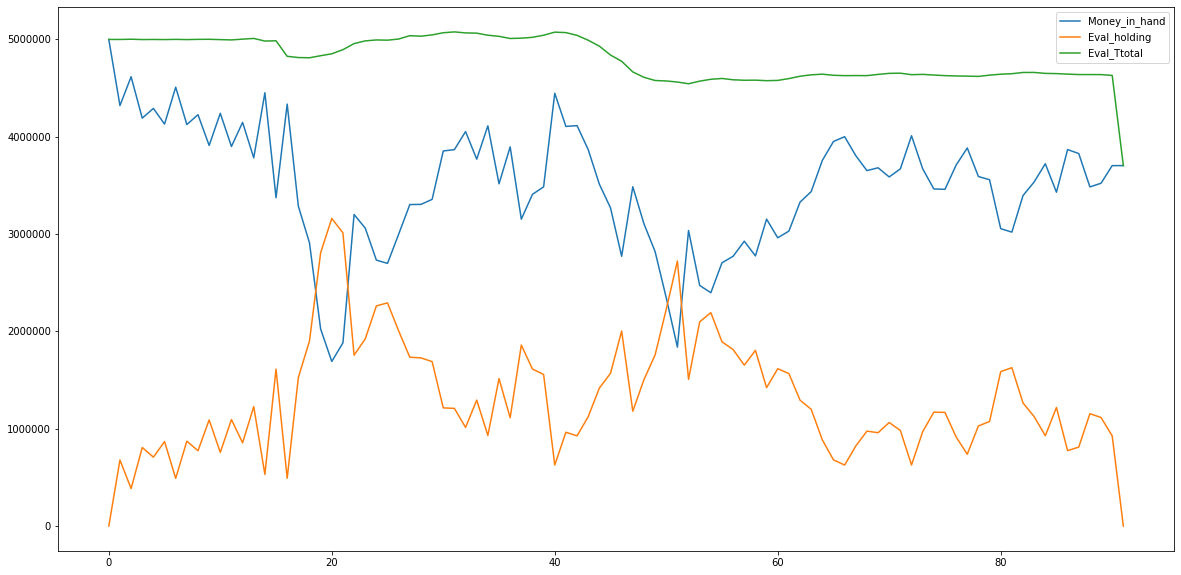

In [8]:
#plot eval value per day on given ET
#fnwp="sftp://homeserver/home/rdchujf/n_workspace/RL/Buy300_2C_CC_try/CC/ET250_money_in_hand.csv"
import os
import pandas as pd
import config as sc
pd.options.display.float_format="{:,.2f}".format
#system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1"
system_name="Buy300_2CC_Scaler50_PolicyLossnew_shift001_RT_AV1_E_2D"
ET=5000
fnwp=os.path.join(sc.base_dir_RL_system,system_name,"CC","ET{0}_money_in_hand.csv".format(ET))
df=pd.read_csv(fnwp)
print (df.columns)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

for title in ["Money_in_hand","Eval_holding","Eval_Ttotal"]:
    plt.plot(df[title], label=title)
plt.legend()
    #plt.plot(df["Money_in_hand"],)
#plt.plot(df["Eval_holding"])
#plt.plot(df["Eval_Ttotal"])



In [ ]:
#analyse action
fnwp="/home/rdchujf/n_workspace/RL/Buy300_2C_CC_try/CC/ET1250_action_decision.csv"
df=pd.read_csv(fnwp)
df.columns
#['DateI', 'not_buy_due_sell', 'not_buy_due_limit','not_buy_due_low_profit', 'sell_due_low_profit']


print (len(df.loc[0,"not_buy_due_sell"].split("_")))
print (len(df.loc[0,"not_buy_due_limit"].split("_")))
#print (df.loc[0,"not_buy_due_low_profit"])
#print (len(df.loc[0,"sell_due_low_profit"].split("_")))
df.loc[0]